# Importing libraries

In [246]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

In [274]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

# Time Series Data Retrieving

In [275]:
df = pd.read_csv("CO2_Emission.csv")
df.head()

MSN  YYYYMM   Value  Column_Order  \
0  CLEIEUS  197301  72.076             1   
1  CLEIEUS  197302  64.442             1   
2  CLEIEUS  197303  64.084             1   
3  CLEIEUS  197304  60.842             1   
4  CLEIEUS  197305  61.798             1   

                                Description  \
0  Coal Electric Power Sector CO2 Emissions   
1  Coal Electric Power Sector CO2 Emissions   
2  Coal Electric Power Sector CO2 Emissions   
3  Coal Electric Power Sector CO2 Emissions   
4  Coal Electric Power Sector CO2 Emissions   

                                    Unit  
0  Million Metric Tons of Carbon Dioxide  
1  Million Metric Tons of Carbon Dioxide  
2  Million Metric Tons of Carbon Dioxide  
3  Million Metric Tons of Carbon Dioxide  
4  Million Metric Tons of Carbon Dioxide

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


# DataPreprocessing 

In [277]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_csv("CO2_Emission.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
df.head()

MSN   Value  Column_Order  \
YYYYMM                                      
1973-01-01  CLEIEUS  72.076             1   
1973-02-01  CLEIEUS  64.442             1   
1973-03-01  CLEIEUS  64.084             1   
1973-04-01  CLEIEUS  60.842             1   
1973-05-01  CLEIEUS  61.798             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide

In [278]:
#we will only use the rows which has date in it

In [279]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)

MSN   Value  Column_Order  \
YYYYMM                                      
1973-01-01  CLEIEUS  72.076             1   
1973-02-01  CLEIEUS  64.442             1   
1973-03-01  CLEIEUS  64.084             1   
1973-04-01  CLEIEUS  60.842             1   
1973-05-01  CLEIEUS  61.798             1   
1973-06-01  CLEIEUS  66.538             1   
1973-07-01  CLEIEUS  72.626             1   
1973-08-01  CLEIEUS  75.181             1   
1973-09-01  CLEIEUS  68.397             1   
1973-10-01  CLEIEUS  67.668             1   
1973-11-01  CLEIEUS  67.021             1   
1973-12-01  CLEIEUS  71.118             1   
1974-01-01  CLEIEUS   70.55             1   
1974-02-01  CLEIEUS  62.929             1   
1974-03-01  CLEIEUS  64.519             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   
1973-06-01  Coal Electric Power Sector CO2 Emissions   
1973-07-01  Coal Electric Power Sector CO2 Emissions   
1973-08-01  Coal Electric Power Sector CO2 Emissions   
1973-09-01  Coal Electric Power Sector CO2 Emissions   
1973-10-01  Coal Electric Power Sector CO2 Emissions   
1973-11-01  Coal Electric Power Sector CO2 Emissions   
1973-12-01  Coal Electric Power Sector CO2 Emissions   
1974-01-01  Coal Electric Power Sector CO2 Emissions   
1974-02-01  Coal Electric Power Sector CO2 Emissions   
1974-03-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide  
1973-06-01  Million Metric Tons of Carbon Dioxide  
1973-07-01  Million Metric Tons of Carbon Dioxide  
1973-08-01  Million Metric Tons of Carbon Dioxide  
1973-09-01  Million Metric Tons of Carbon Dioxide  
1973-10-01  Million Metric Tons of Carbon Dioxide  
1973-11-01  Million Metric Tons of Carbon Dioxide  
1973-12-01  Million Metric Tons of Carbon Dioxide  
1974-01-01  Million Metric Tons of Carbon Dioxide  
1974-02-01  Million Metric Tons of Carbon Dioxide  
1974-03-01  Million Metric Tons of Carbon Dioxide

In [280]:
print(df.info())
print(ts.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5094 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   Value         5094 non-null   object
 2   Column_Order  5094 non-null   int64 
 3   Description   5094 non-null   object
 4   Unit          5094 non-null   object
dtypes: int64(1), object(4)
memory usage: 238.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           4707 non-null   object
 1   Value         4707 non-null   object
 2   Column_Order  4707 non-null   int64 
 3   Description   4707 non-null   object
 4   Unit          4707 non-null   object
dtypes: int64(1), object(4)
memory usage: 220.6+ KB
None


In [281]:
ts.dtypes

MSN             object
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object

In [282]:
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts.head()

MSN   Value  Column_Order  \
YYYYMM                                      
1973-01-01  CLEIEUS  72.076             1   
1973-02-01  CLEIEUS  64.442             1   
1973-03-01  CLEIEUS  64.084             1   
1973-04-01  CLEIEUS  60.842             1   
1973-05-01  CLEIEUS  61.798             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide

In [283]:
ts.dropna(inplace = True)
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4323 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSN           4323 non-null   object 
 1   Value         4323 non-null   float64
 2   Column_Order  4323 non-null   int64  
 3   Description   4323 non-null   object 
 4   Unit          4323 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 202.6+ KB


In [284]:
Energy_sources = ts.groupby('Description')
Energy_sources.head()

MSN    Value  Column_Order  \
YYYYMM                                       
1973-01-01  CLEIEUS   72.076             1   
1973-02-01  CLEIEUS   64.442             1   
1973-03-01  CLEIEUS   64.084             1   
1973-04-01  CLEIEUS   60.842             1   
1973-05-01  CLEIEUS   61.798             1   
1973-01-01  NNEIEUS   12.175             2   
1973-02-01  NNEIEUS   11.708             2   
1973-03-01  NNEIEUS   13.994             2   
1973-04-01  NNEIEUS   14.627             2   
1973-05-01  NNEIEUS   17.344             2   
1973-01-01  DKEIEUS    2.375             3   
1973-02-01  DKEIEUS    2.061             3   
1973-03-01  DKEIEUS    1.171             3   
1973-04-01  DKEIEUS    1.022             3   
1973-05-01  DKEIEUS    0.949             3   
1973-01-01  PCEIEUS    0.128             4   
1973-02-01  PCEIEUS    0.106             4   
1973-03-01  PCEIEUS    0.083             4   
1973-04-01  PCEIEUS    0.130             4   
1973-05-01  PCEIEUS    0.167             4   
1973-01-01  RFEIEUS   24.867             5   
1973-02-01  RFEIEUS   20.867             5   
1973-03-01  RFEIEUS   19.780             5   
1973-04-01  RFEIEUS   16.562             5   
1973-05-01  RFEIEUS   17.754             5   
1973-01-01  PAEIEUS   27.369             6   
1973-02-01  PAEIEUS   23.034             6   
1973-03-01  PAEIEUS   21.034             6   
1973-04-01  PAEIEUS   17.714             6   
1973-05-01  PAEIEUS   18.870             6   
1989-01-01  GEEIEUS    0.031             7   
1989-02-01  GEEIEUS    0.028             7   
1989-03-01  GEEIEUS    0.031             7   
1989-04-01  GEEIEUS    0.030             7   
1989-05-01  GEEIEUS    0.031             7   
1989-01-01  NWEIEUS    0.371             8   
1989-02-01  NWEIEUS    0.335             8   
1989-03-01  NWEIEUS    0.371             8   
1989-04-01  NWEIEUS    0.359             8   
1989-05-01  NWEIEUS    0.371             8   
1973-01-01  TXEIEUS  111.621             9   
1973-02-01  TXEIEUS   99.185             9   
1973-03-01  TXEIEUS   99.112             9   
1973-04-01  TXEIEUS   93.183             9   
1973-05-01  TXEIEUS   98.012             9   

                                                  Description  \
YYYYMM                                                          
1973-01-01           Coal Electric Power Sector CO2 Emissions   
1973-02-01           Coal Electric Power Sector CO2 Emissions   
1973-03-01           Coal Electric Power Sector CO2 Emissions   
1973-04-01           Coal Electric Power Sector CO2 Emissions   
1973-05-01           Coal Electric Power Sector CO2 Emissions   
1973-01-01    Natural Gas Electric Power Sector CO2 Emissions   
1973-02-01    Natural Gas Electric Power Sector CO2 Emissions   
1973-03-01    Natural Gas Electric Power Sector CO2 Emissions   
1973-04-01    Natural Gas Electric Power Sector CO2 Emissions   
1973-05-01    Natural Gas Electric Power Sector CO2 Emissions   
1973-01-01  Distillate Fuel, Including Kerosene-Type Jet F...   
1973-02-01  Distillate Fuel, Including Kerosene-Type Jet F...   
1973-03-01  Distillate Fuel, Including Kerosene-Type Jet F...   
1973-04-01  Distillate Fuel, Including Kerosene-Type Jet F...   
1973-05-01  Distillate Fuel, Including Kerosene-Type Jet F...   
1973-01-01  Petroleum Coke Electric Power Sector CO2 Emiss...   
1973-02-01  Petroleum Coke Electric Power Sector CO2 Emiss...   
1973-03-01  Petroleum Coke Electric Power Sector CO2 Emiss...   
1973-04-01  Petroleum Coke Electric Power Sector CO2 Emiss...   
1973-05-01  Petroleum Coke Electric Power Sector CO2 Emiss...   
1973-01-01  Residual Fuel Oil Electric Power Sector CO2 Em...   
1973-02-01  Residual Fuel Oil Electric Power Sector CO2 Em...   
1973-03-01  Residual Fuel Oil Electric Power Sector CO2 Em...   
1973-04-01  Residual Fuel Oil Electric Power Sector CO2 Em...   
1973-05-01  Residual Fuel Oil Electric Power Sector CO2 Em...   
1973-01-01      Petroleum Electric Power Sector CO2 Emissions   
1973-02-01      Petroleum Electri

In [285]:
print("unique Description:",df.Description.unique())
print("\n unique Unit:",df.Unit.unique())

unique Description: ['Coal Electric Power Sector CO2 Emissions'
 'Natural Gas Electric Power Sector CO2 Emissions'
 'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions'
 'Petroleum Coke Electric Power Sector CO2 Emissions'
 'Residual Fuel Oil Electric Power Sector CO2 Emissions'
 'Petroleum Electric Power Sector CO2 Emissions'
 'Geothermal Energy Electric Power Sector CO2 Emissions'
 'Non-Biomass Waste Electric Power Sector CO2 Emissions'
 'Total Energy Electric Power Sector CO2 Emissions']

 unique Unit: ['Million Metric Tons of Carbon Dioxide']


# The CO2 emission time series dataset is ploted to visualize the dependency of the emission in the power generation with time.

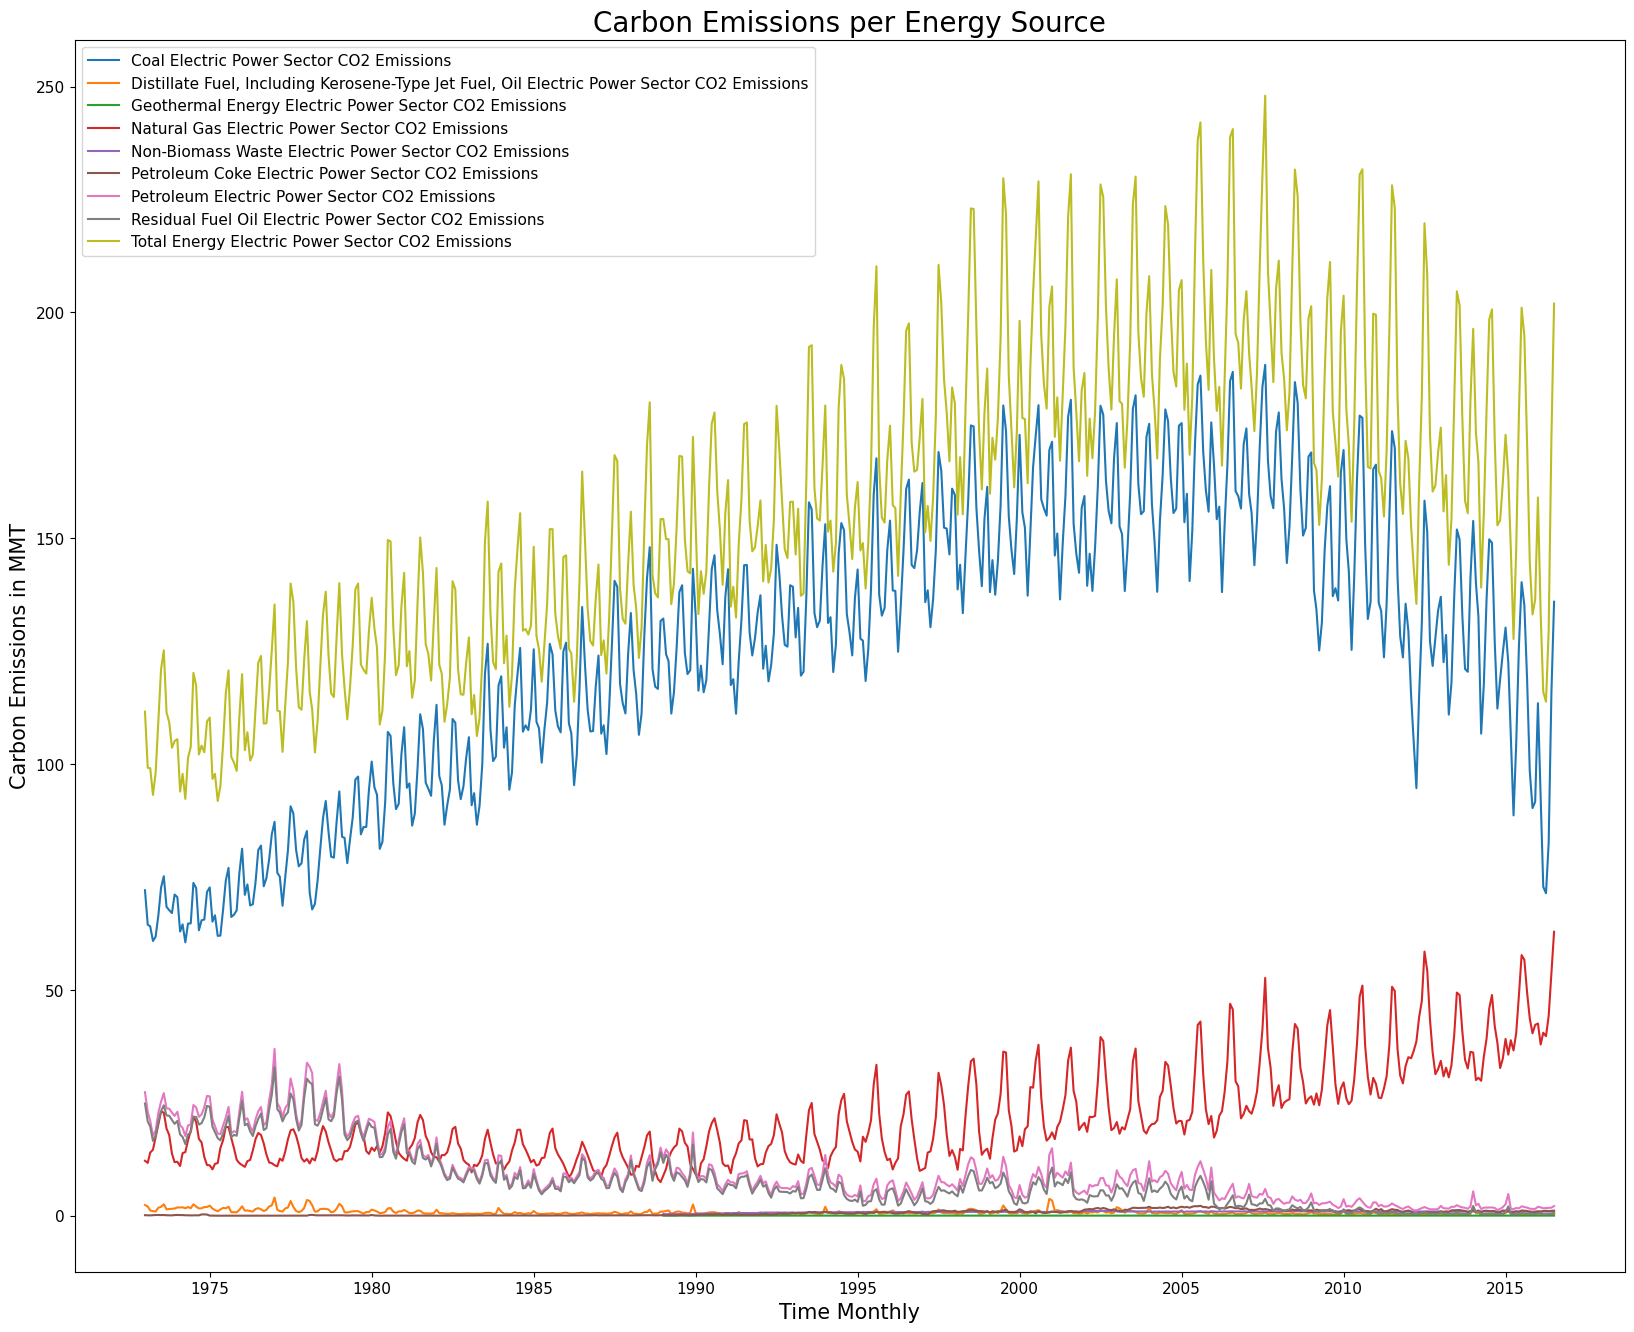

In [286]:
import matplotlib.pyplot as plt

# Assuming 'Energy_sources' is your grouped DataFrame
# Make sure 'Value' is the column you want on the y-axis

for name, group in Energy_sources:
    plt.plot(group.index, group['Value'], label=name)  # 'marker' adds points for each data point

plt.xlabel('Time Monthly', fontsize=15)
plt.ylabel('Carbon Emissions in MMT', fontsize=15)
plt.rc('font', size=11)
plt.title('Carbon Emissions per Energy Source', fontsize=20)
plt.legend()
plt.show()


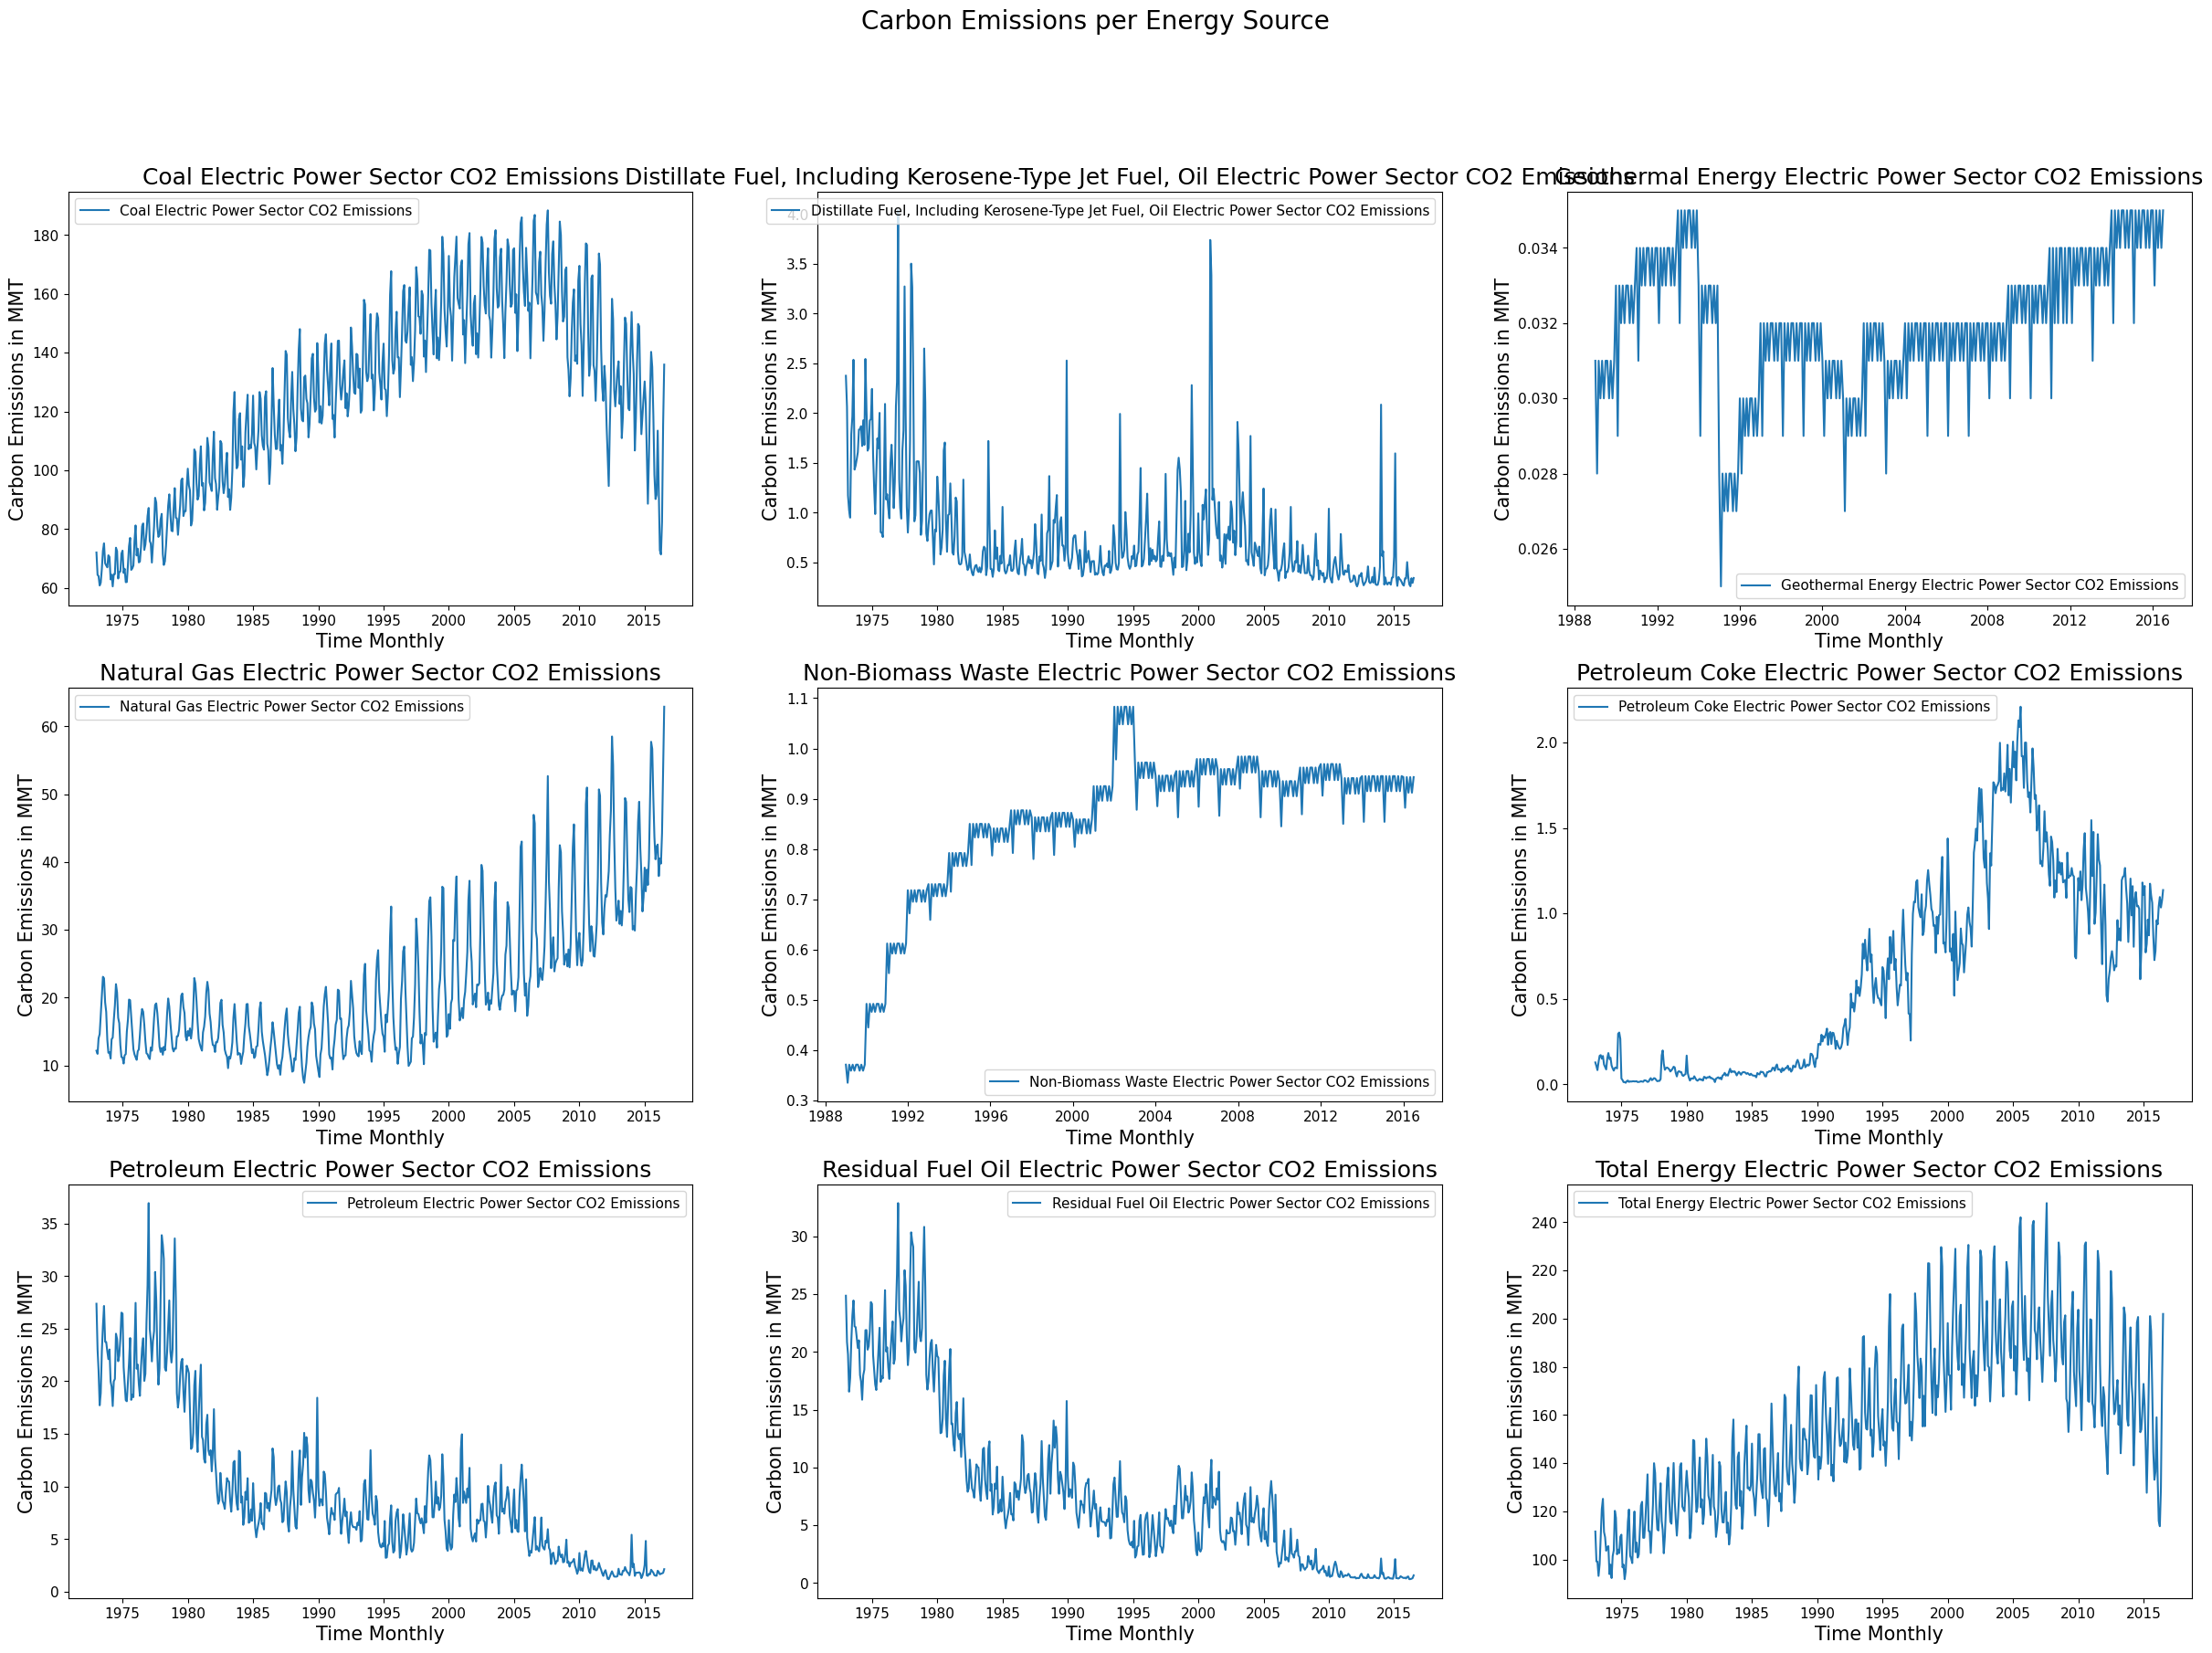

In [287]:
import matplotlib.pyplot as plt

# Assuming 'Energy_sources' is your grouped DataFrame
# Make sure 'Value' is the column you want on the y-axis

fig, axes = plt.subplots(3, 3, figsize=(30, 20))

for (desc, group), ax in zip(Energy_sources, axes.flatten()):
    if not group.empty:  # Check if the group is not empty
        ax.plot(group.index, group['Value'], label=desc)
        ax.set_xlabel('Time Monthly', fontsize=15)
        ax.set_ylabel('Carbon Emissions in MMT', fontsize=15)
        ax.set_title(desc, fontsize=18)
        ax.legend()
    else:
        print(f"Empty group for {desc}")

# Set the font size for all labels globally
plt.rc('font', size=11)
plt.suptitle('Carbon Emissions per Energy Source', fontsize=20)


plt.show()


In [288]:
CO2_per_source = ts.groupby('Description')['Value'].sum().sort_values()

In [289]:
CO2_per_source.index

Index(['Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'],
      dtype='object', name='Description')

In [290]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

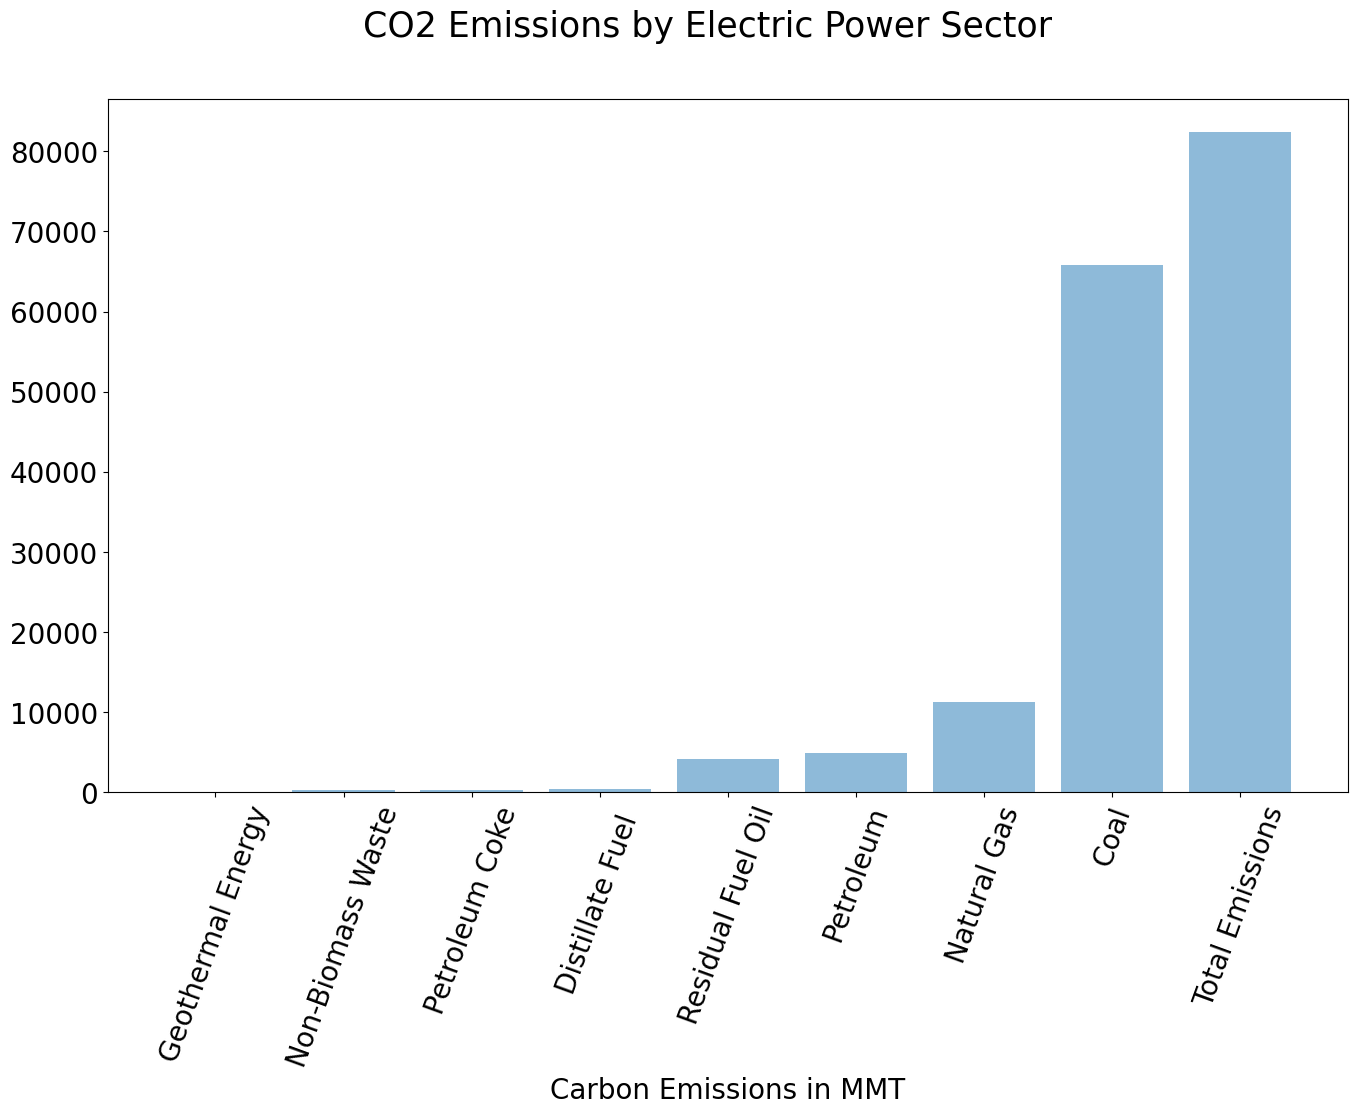

In [291]:
fig = plt.figure(figsize = (16,9))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Carbon Emissions in MMT', fontsize = 20)
plt.show()

# From the bar chart, we can see that the contribution of coal to the total CO2 emission is significant followed by natural gas.

# Test Stationarity

In [292]:
# Assuming 'ts' is your DataFrame with a datetime index and 'Value' column
Emissions = ts.iloc[:, 1:]  # Monthly total emissions (mte)
Emissions = Emissions.groupby(['Description', Emissions.index.to_period('M')])['Value'].sum().unstack(level=0)
mte = Emissions['Natural Gas Electric Power Sector CO2 Emissions']  # Monthly total emissions (mte)
mte.head()

YYYYMM
1973-01    12.175
1973-02    11.708
1973-03    13.994
1973-04    14.627
1973-05    17.344
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

In [293]:
mte.tail()

YYYYMM
2016-03    40.525
2016-04    39.763
2016-05    44.210
2016-06    53.567
2016-07    62.881
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

In [294]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

# From the figures, it is evident that there is a trend in the CO2 emission dataset with seasonal variation. So, we can infer a concluding remark that the dataset is not stationary.

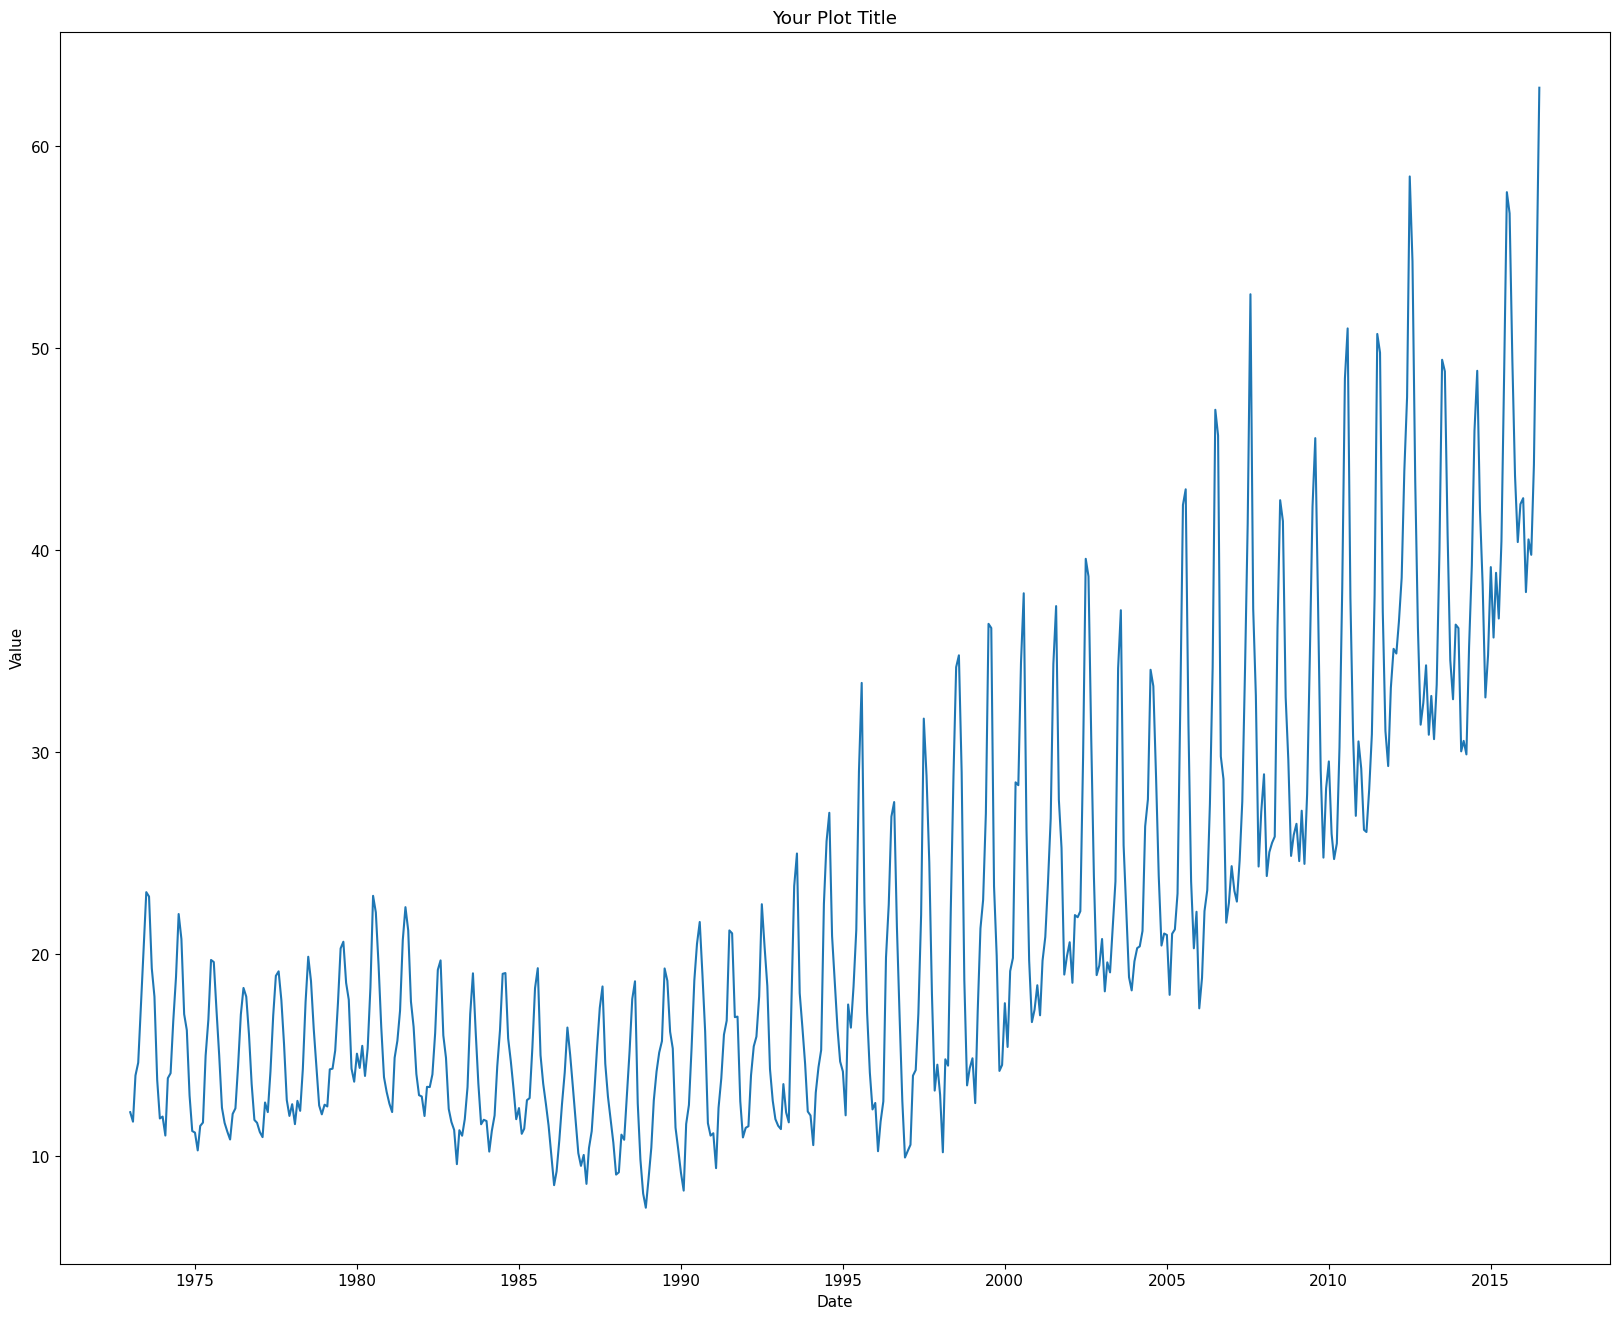

In [306]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming mte is your Pandas Series with a Period index
mte.index = mte.index.to_timestamp()

# Plotting
plt.plot(mte)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Your Plot Title')
plt.show()


# 5.1.2 Test stationary using Dickey-Fuller¶


In [307]:
# A formal way of testing stationarity of a dataset is using plotting the moving average or moving variance 
# and see if the series mean and variance varies with time. 
# This approach will be handled by the TestStationaryPlot() method. 
# The second way to test stationarity is to use the statistical test (the Dickey-Fuller Test). 
# The null hypothesis for the test is that the time series is non-stationary. 
# The test results compare a Test Statistic and Critical Values (cutoff value) at different confidence levels. 
# If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. 
# This technique will be handled by the TestStationaryAdfuller( ) method given below.

In [308]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    plt.xlabel('Time in Years', fontsize = 25)
    plt.ylabel('Total Emissions', fontsize = 25)
    plt.legend(loc='best', fontsize = 25)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [309]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

# Testing the monthly emissions time series¶
 

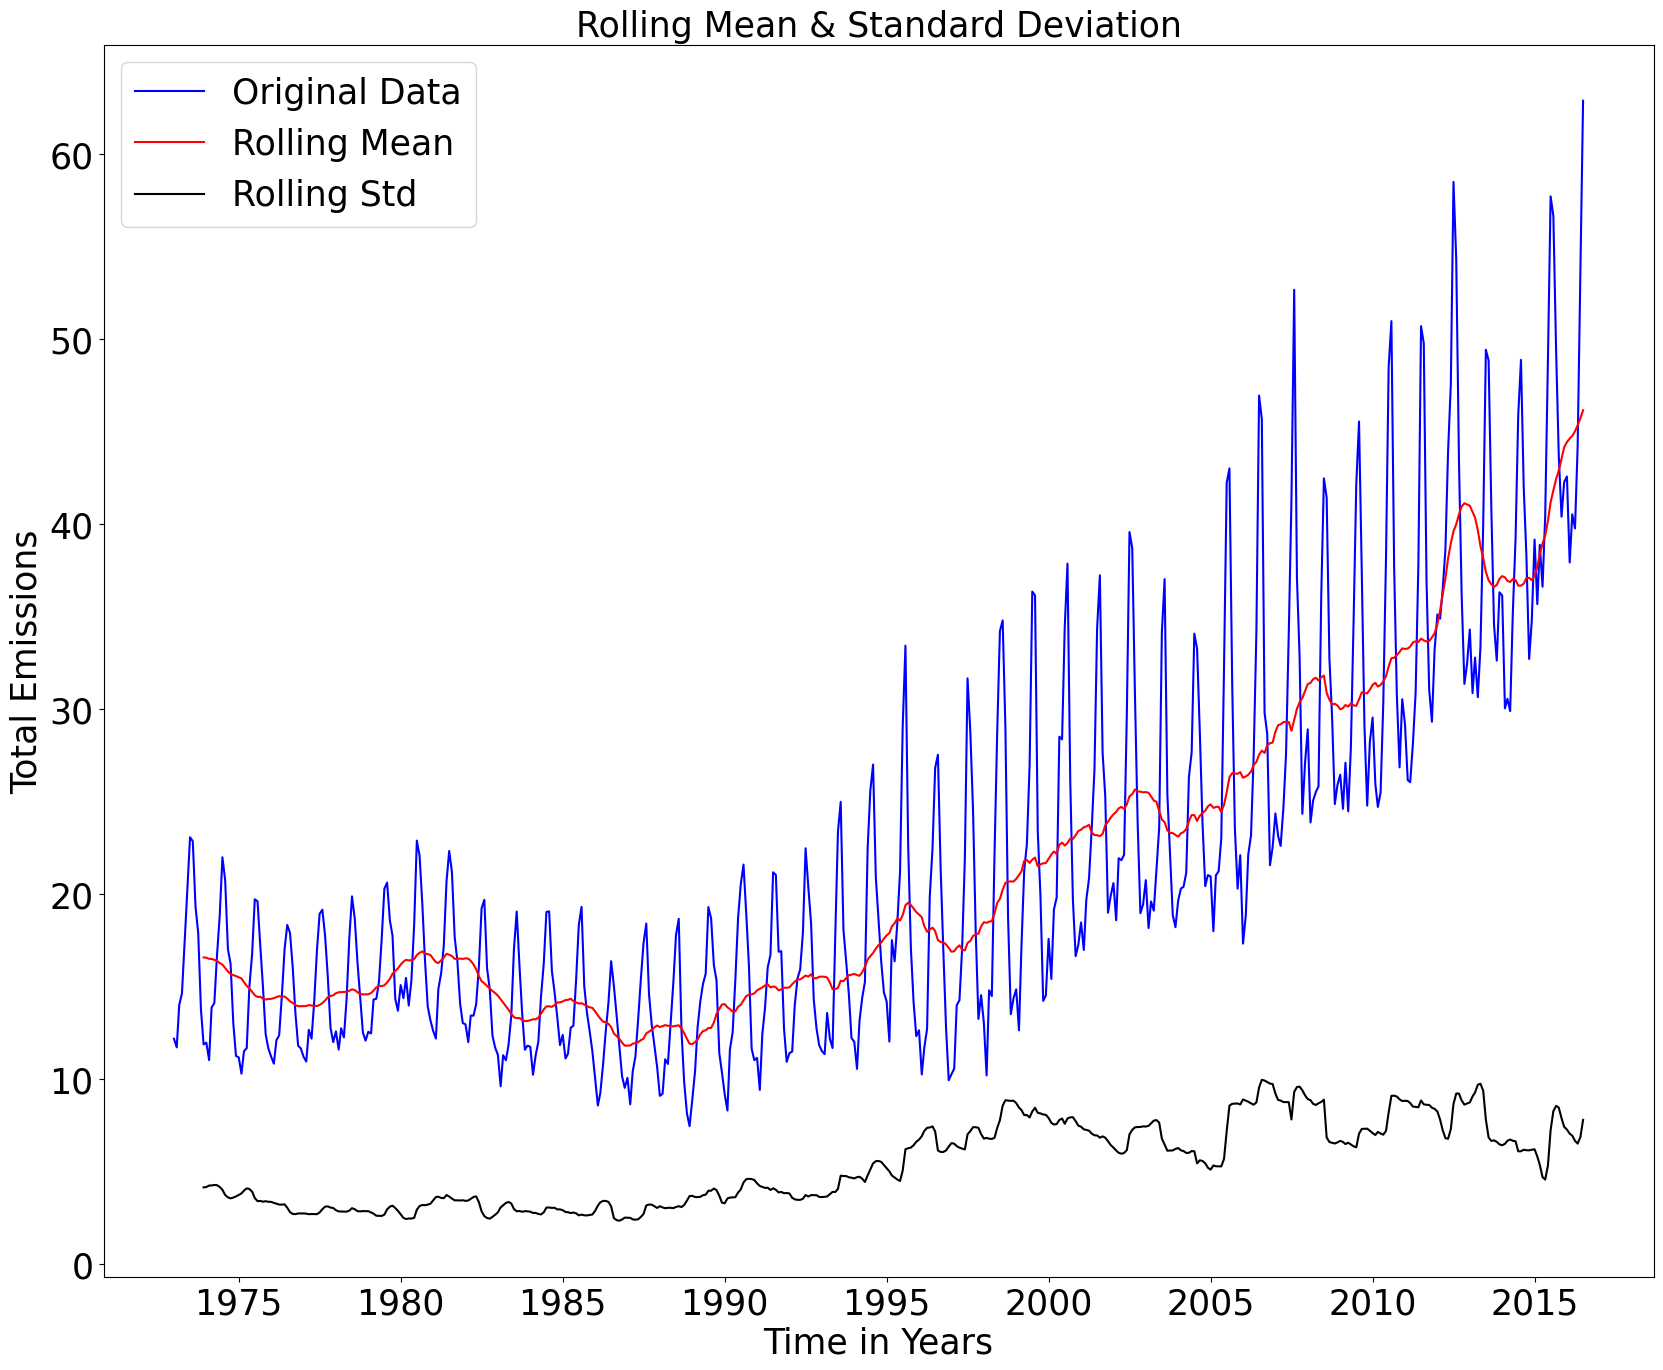

In [310]:
TestStationaryPlot(mte)

In [311]:
TestStationaryAdfuller(mte)

Test Statistic                   1.831215
p-value                          0.998409
#Lags Used                      19.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Transform the dataset to stationary

In [312]:
# The most common techniques used to estimate or model trend and then remove it from the time series are

# Aggregation – taking average for a time period like monthly/weekly average
# Smoothing – taking rolling averages
# Polynomial Fitting – fit a regression model

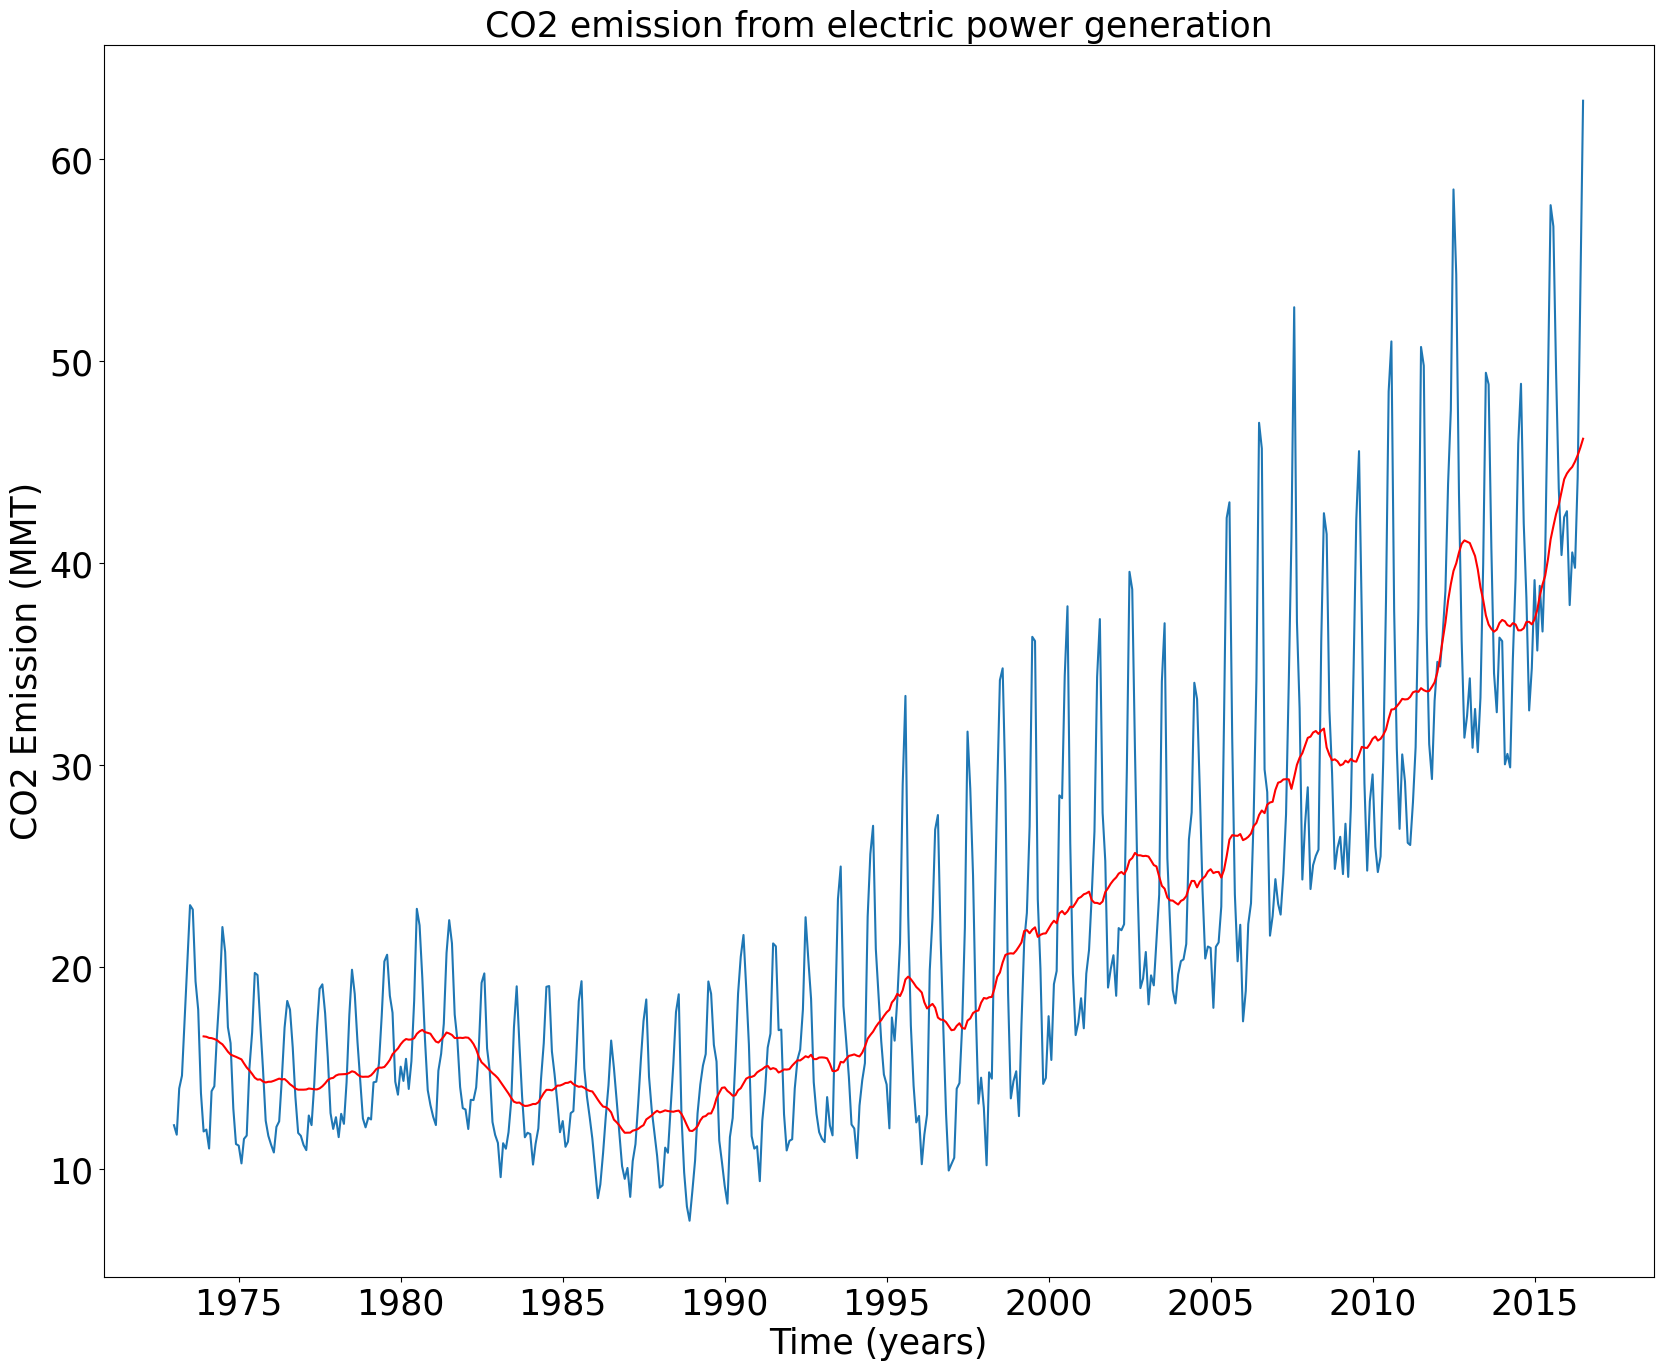

In [313]:
moving_avg = mte.rolling(12).mean()
plt.plot(mte)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.ylabel('CO2 Emission (MMT)', fontsize = 25)
plt.title('CO2 emission from electric power generation', fontsize = 25)
plt.show()

In [314]:
mte_moving_avg_diff = mte - moving_avg
mte_moving_avg_diff.head(13)

YYYYMM
1973-01-01         NaN
1973-02-01         NaN
1973-03-01         NaN
1973-04-01         NaN
1973-05-01         NaN
1973-06-01         NaN
1973-07-01         NaN
1973-08-01         NaN
1973-09-01         NaN
1973-10-01         NaN
1973-11-01         NaN
1973-12-01   -4.705333
1974-01-01   -4.594333
Freq: MS, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

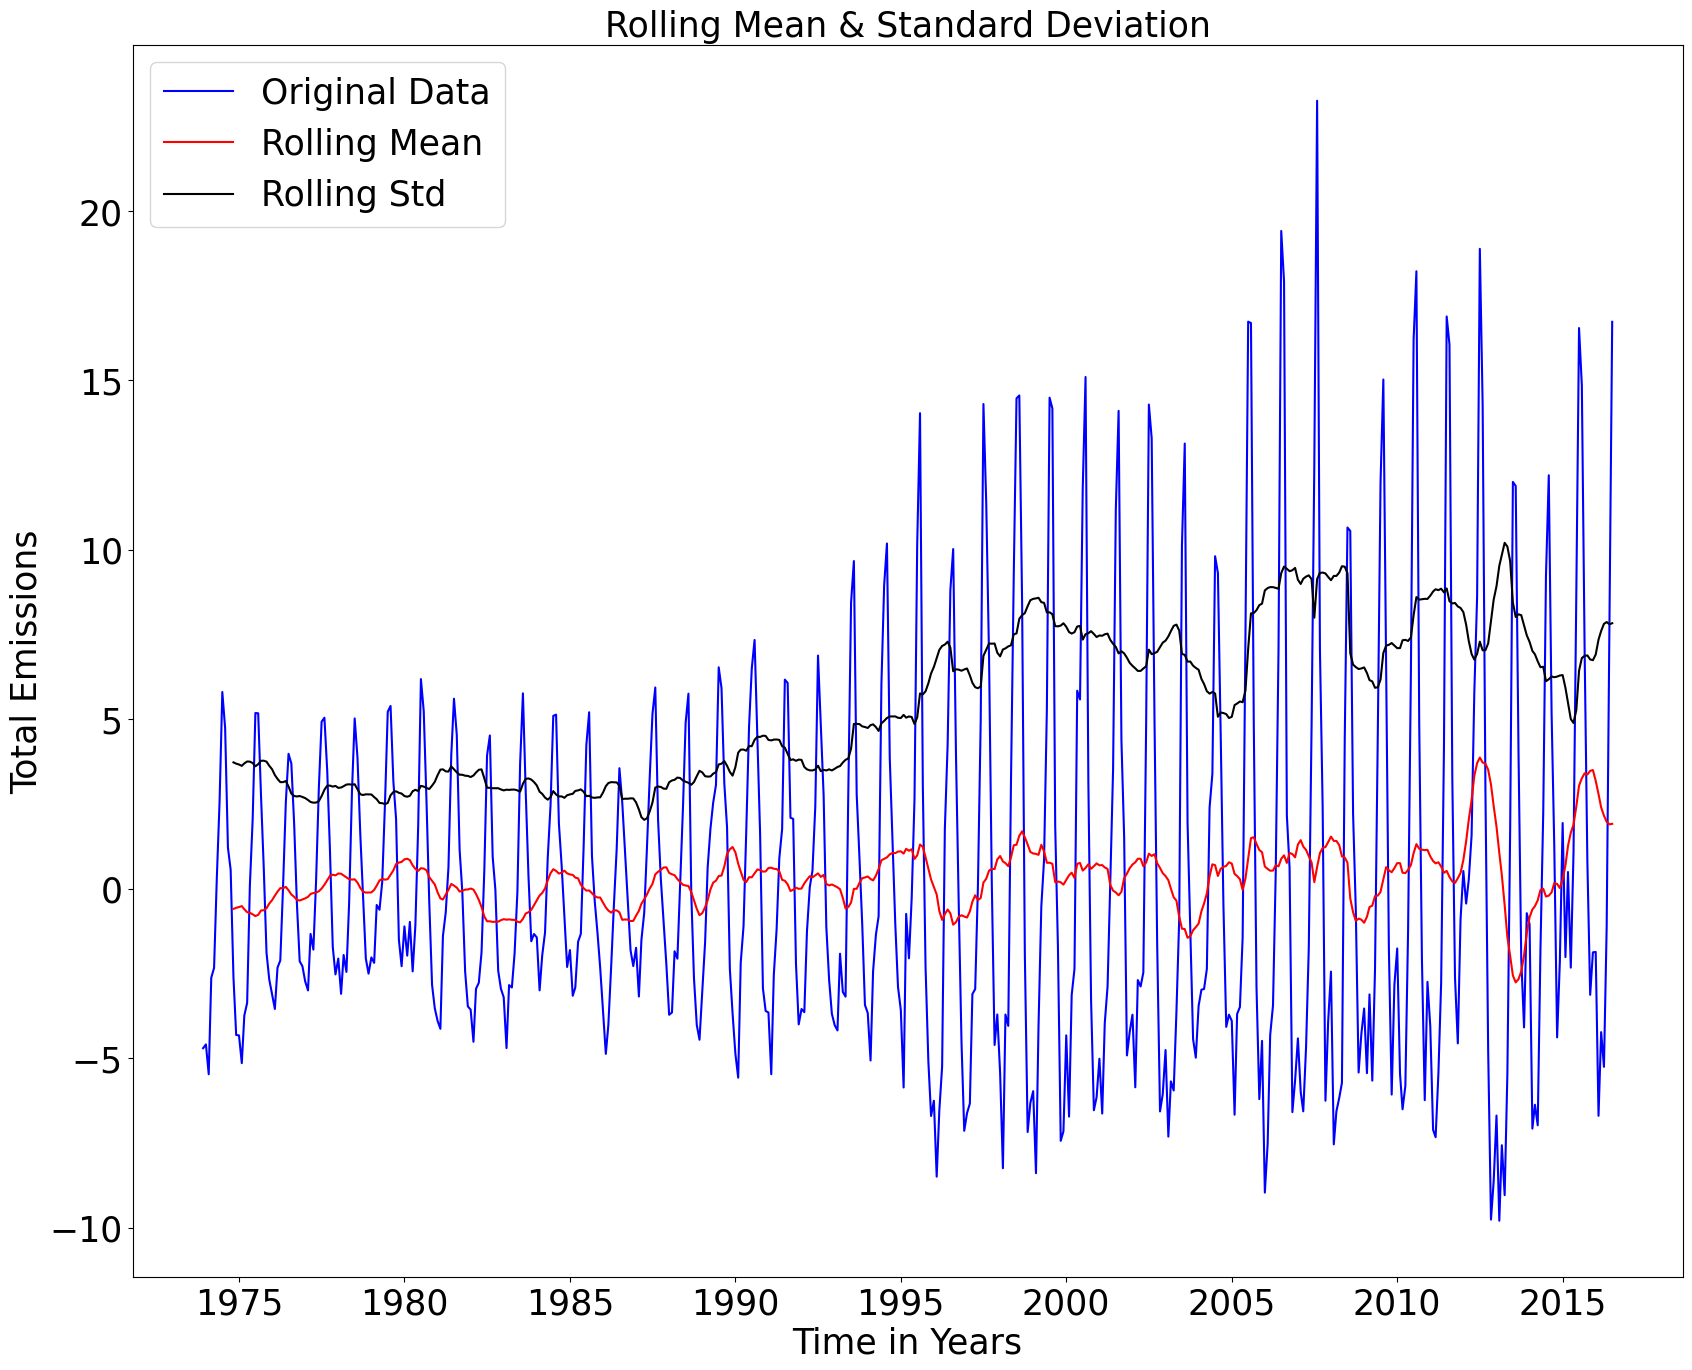

In [315]:
mte_moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(mte_moving_avg_diff)

In [316]:
TestStationaryAdfuller(mte_moving_avg_diff)

Test Statistic                  -5.138977
p-value                          0.000012
#Lags Used                      19.000000
Number of Observations Used    492.000000
Critical Value (1%)             -3.443711
Critical Value (5%)             -2.867432
Critical Value (10%)            -2.569908
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


# Eliminating trend and seasonality: Differencing

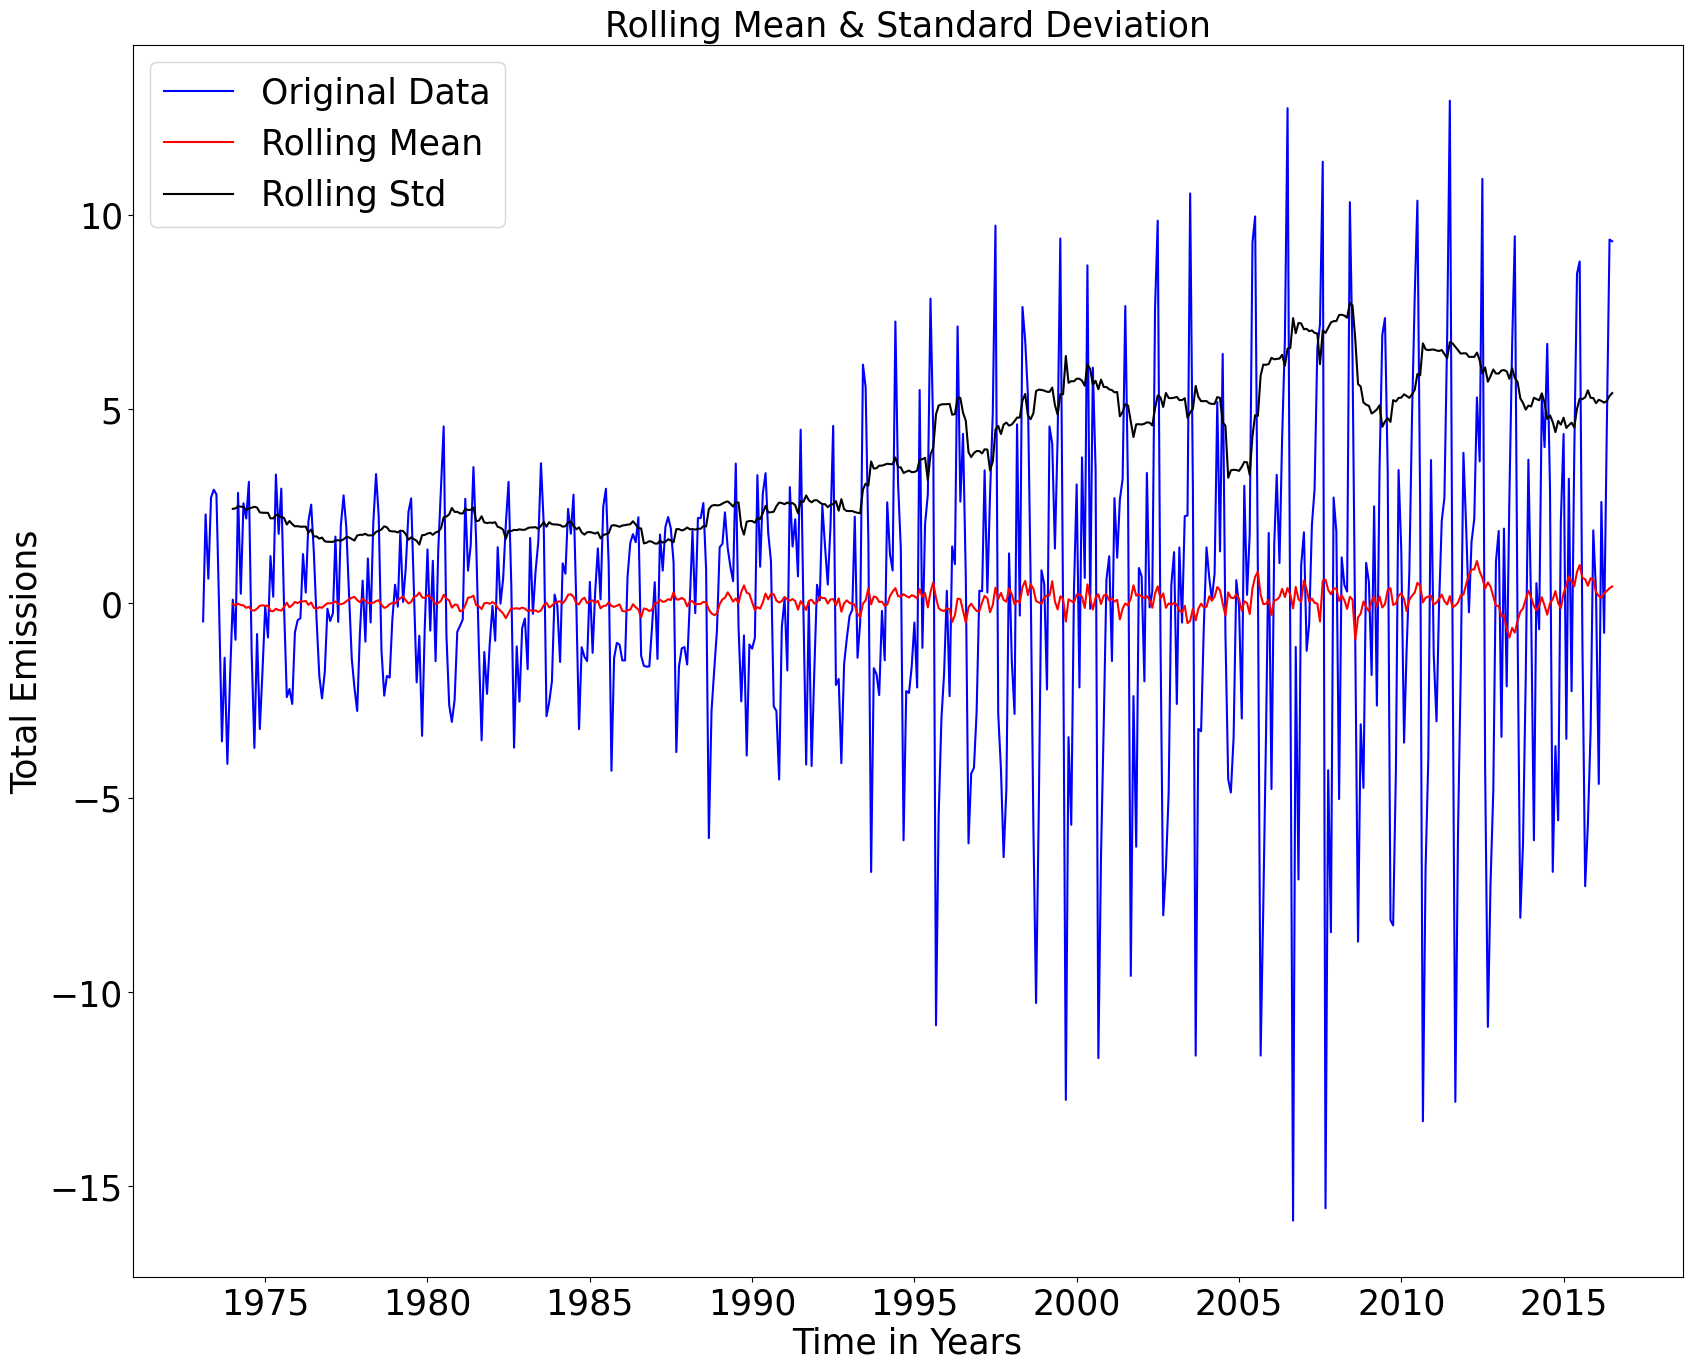

In [317]:
mte_first_difference = mte - mte.shift(1)  
TestStationaryPlot(mte_first_difference.dropna(inplace=False))

In [318]:
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

Test Statistic                  -5.435116
p-value                          0.000003
#Lags Used                      18.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


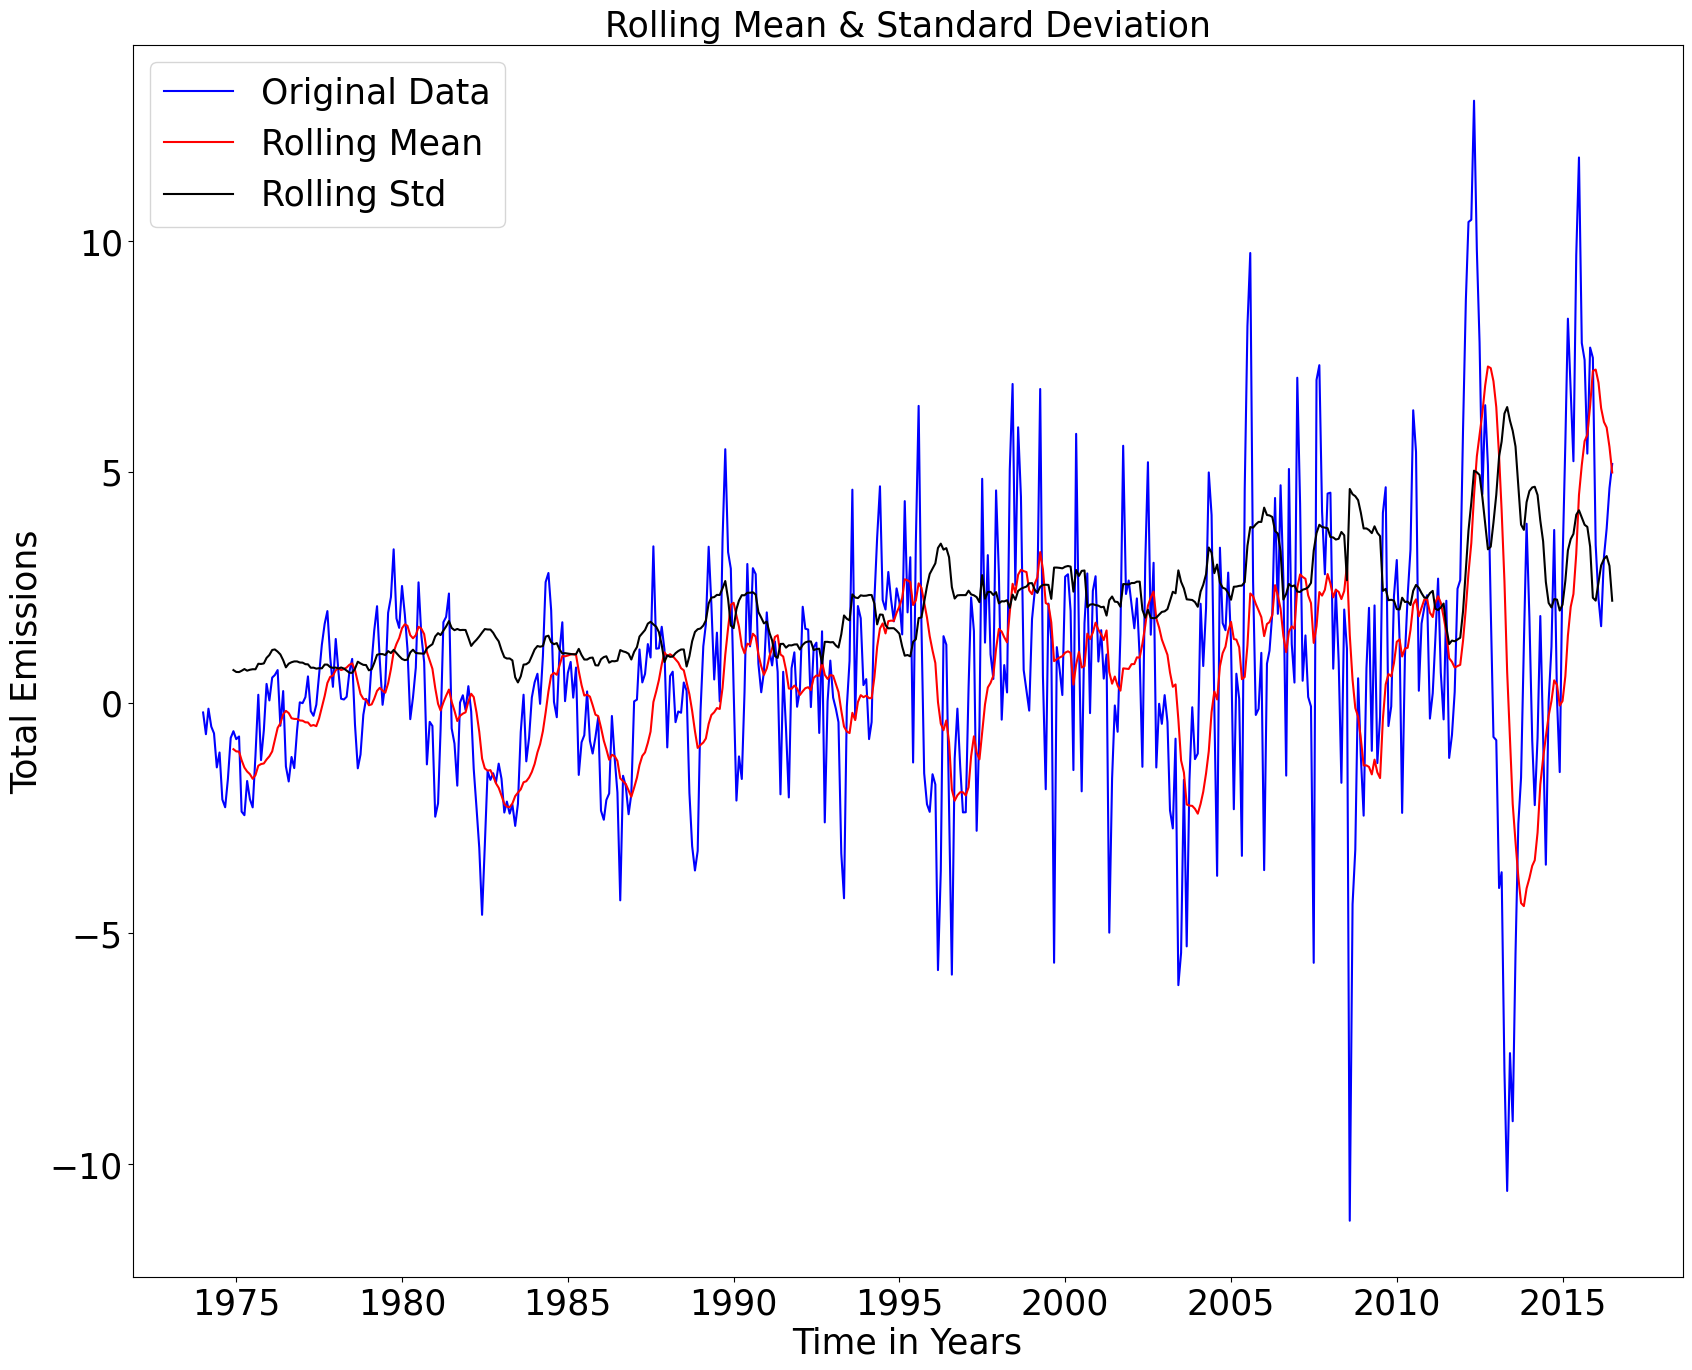

Test Statistic                  -4.412396
p-value                          0.000282
#Lags Used                      13.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [319]:
# The first difference improves the stationarity of the series significantly. 
# Let us use also the seasonal difference to remove the seasonality of the data and see how that impacts stationarity of the
# data.
mte_seasonal_difference = mte - mte.shift(12)  
TestStationaryPlot(mte_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(mte_seasonal_difference.dropna(inplace=False))

# Find optimal parameters and build SARIMA model

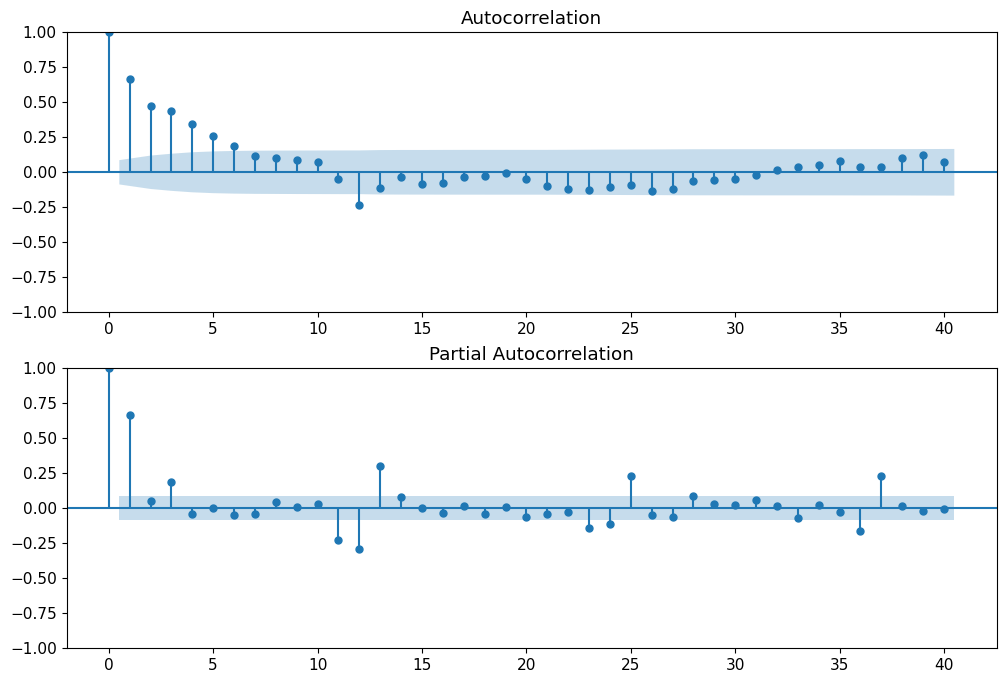

In [320]:
# plotting acf and pacf to find optimal paramter
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mte_seasonal_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mte_seasonal_difference.iloc[13:], lags=40, ax=ax2)

In [321]:
# To find the optimal parameters for ARIMA models using the graphical method is not trivial and 
# it is time consuming. 
# We will select the optimal parameter values systematically using the grid search (hyperparameter optimization) method. 

In [322]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [323]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [324]:
mod = sm.tsa.statespace.SARIMAX(mte, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                              SARIMAX Results                                              
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -997.777
Date:                                             Mon, 27 Nov 2023   AIC                           2003.553
Time:                                                     00:18:59   BIC                           2020.380
Sample:                                                 01-01-1973   HQIC                          2010.158
                                                      - 07-01-2016                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value close to 0, so it is reasonable to include the features in our model.

When fitting seasonal ARIMA models, it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. First, we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model

<AxesSubplot:xlabel='YYYYMM'>

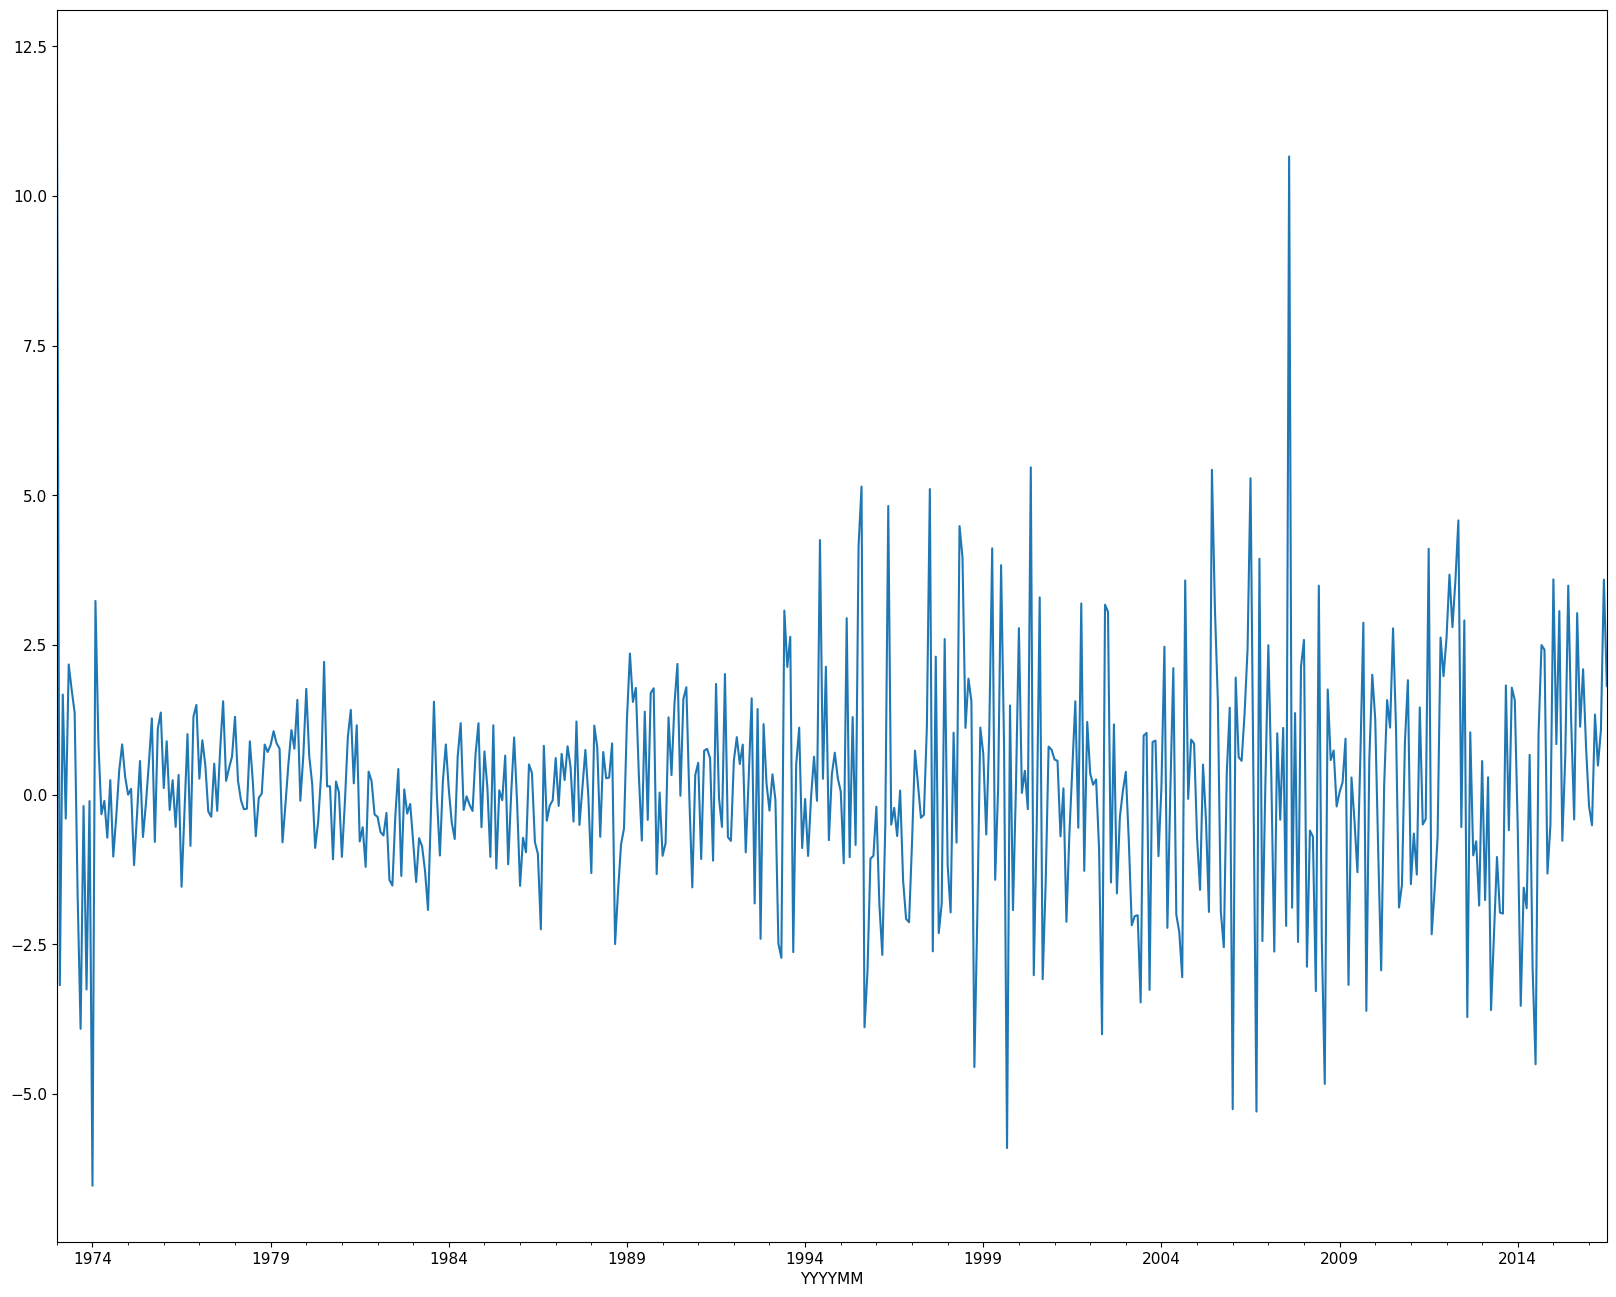

In [325]:
results.resid.plot()

<AxesSubplot:ylabel='Density'>

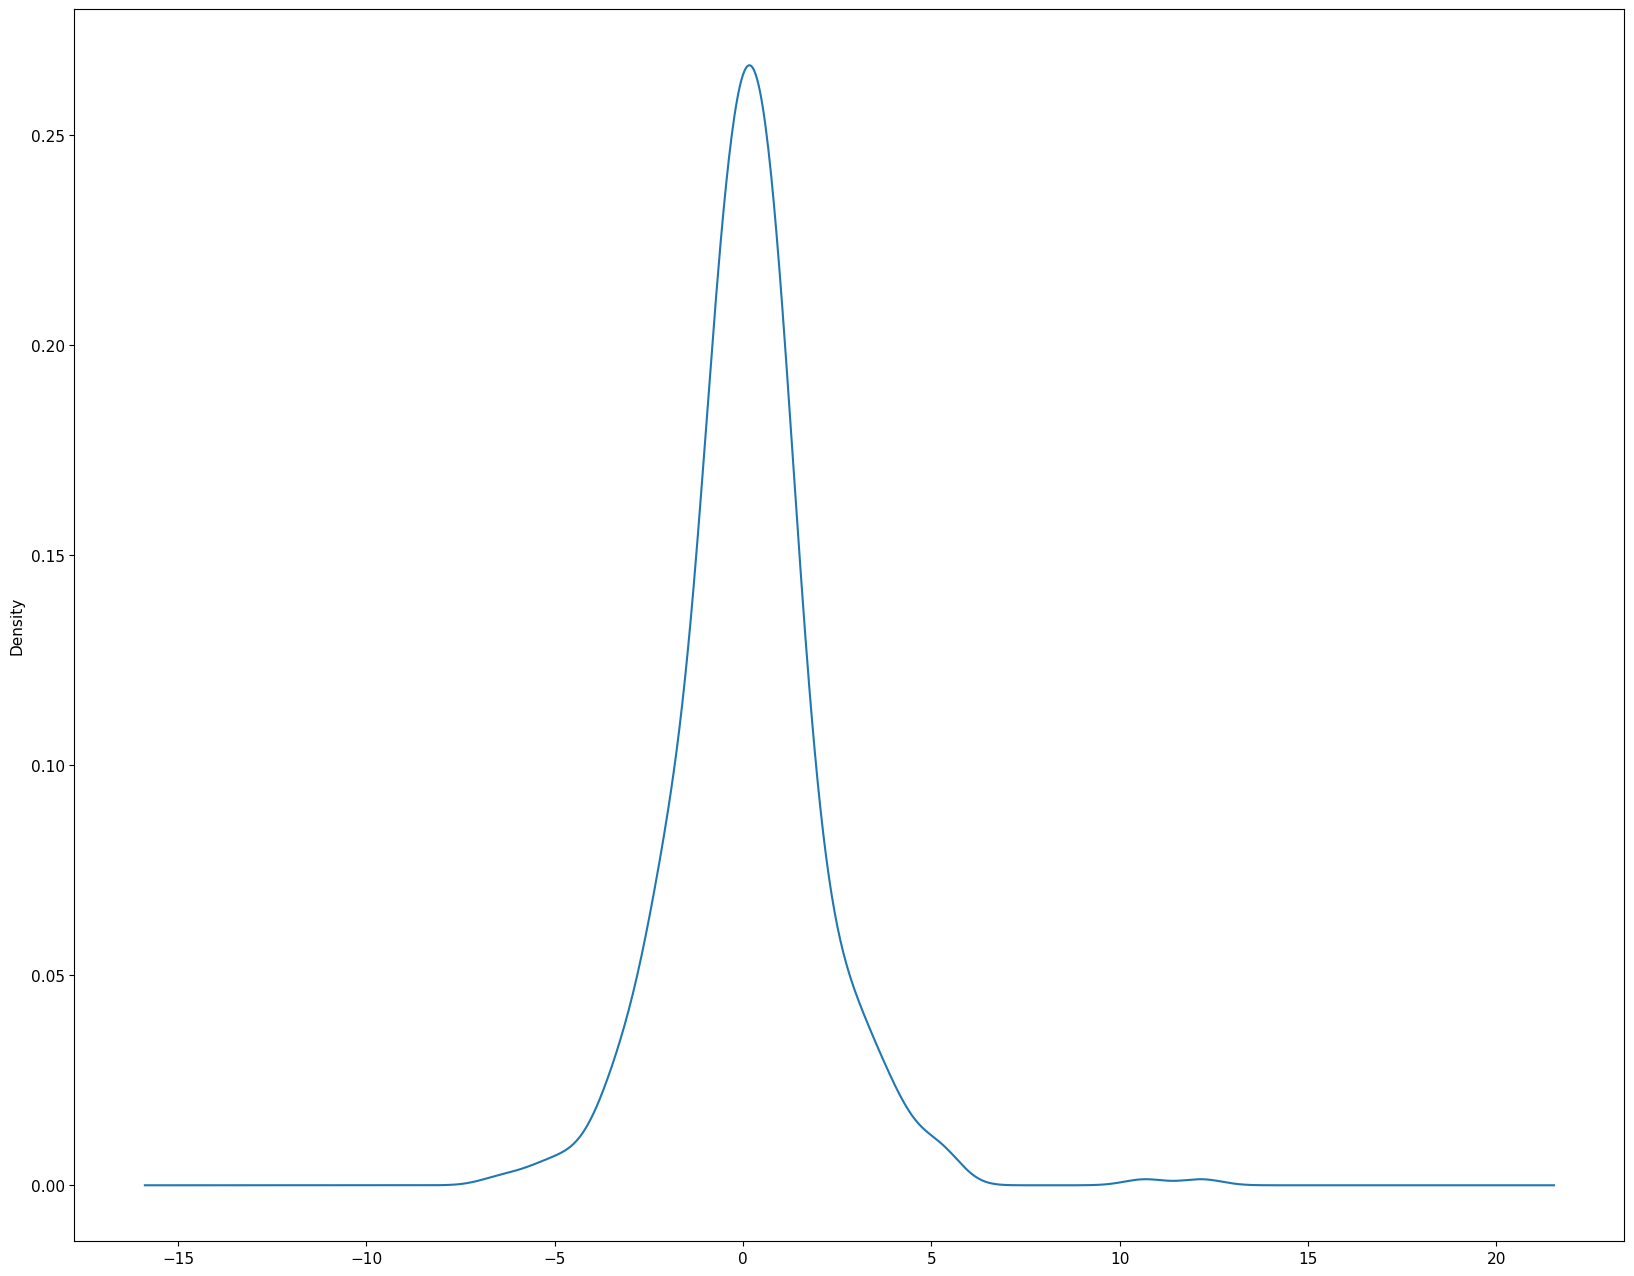

In [326]:
results.resid.plot(kind='kde')

# Validating Prediction

We have obtained a model for our time series that can now be used to produce forecasts. We start by comparing predicted values to real values of the time series, which will help us understand the accuracy of our forecast. The get_prediction() and conf_int() attributes allow us to obtain the values and associated confidence intervals for forecasts of the time series.

In [327]:
pred = results.get_prediction(start = 480, end = 523, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

lower Natural Gas Electric Power Sector CO2 Emissions  \
2013-01-01                                          30.203836       
2013-02-01                                          29.088381       
2013-03-01                                          28.958986       
2013-04-01                                          30.708074       
2013-05-01                                          32.104080       

            upper Natural Gas Electric Power Sector CO2 Emissions  
2013-01-01                                          37.257326      
2013-02-01                                          36.141871      
2013-03-01                                          36.012476      
2013-04-01                                          37.761564      
2013-05-01                                          39.157570

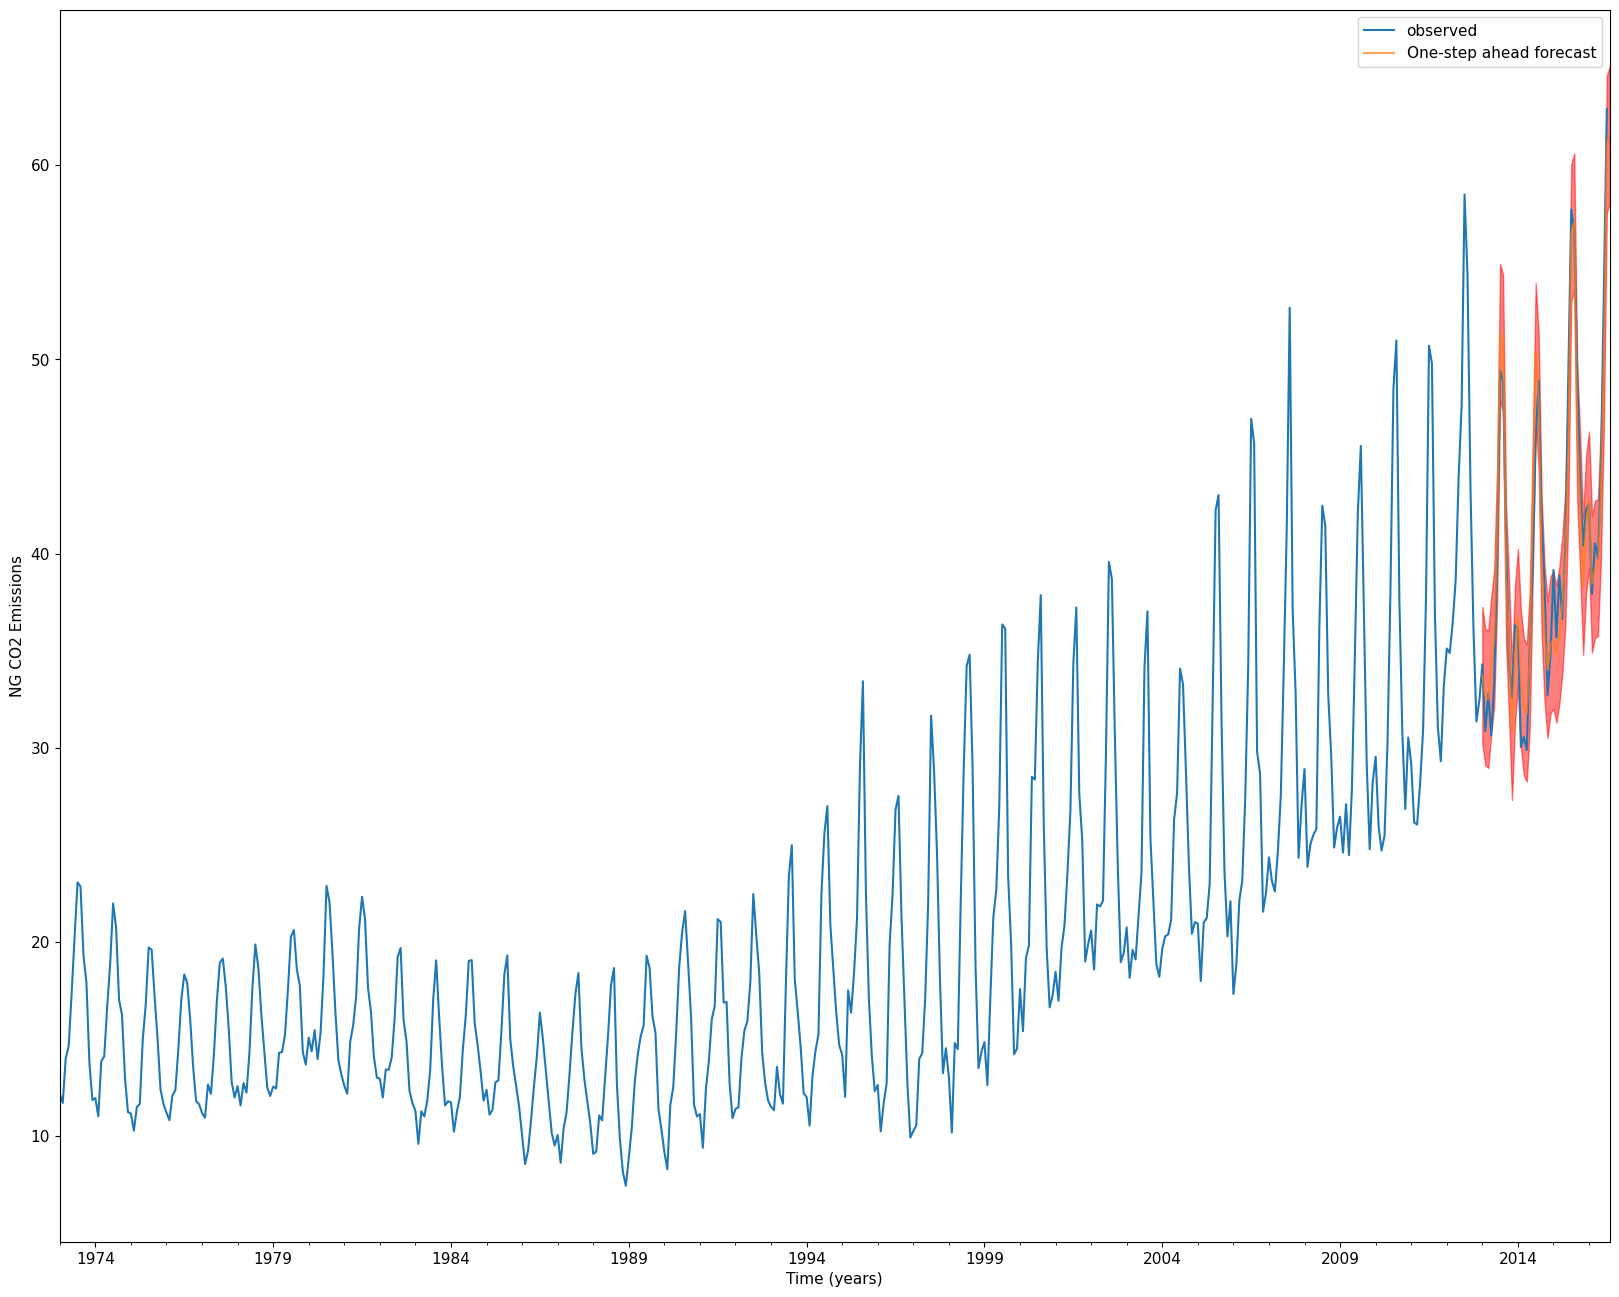

In [328]:
ax = mte['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

plt.show()

In [329]:
mte_forecast = pred.predicted_mean
mte_truth = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 4.18
The Root Mean Square Error (RMSE) of the forcast: nan


In [330]:
mte_forecast = pred.predicted_mean
mte_truth = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 4.18
The Root Mean Square Error (RMSE) of the forcast: nan


# Forecasting 

In [331]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

lower Natural Gas Electric Power Sector CO2 Emissions  \
2016-08-01                                          58.062559       
2016-09-01                                          47.316615       
2016-10-01                                          40.736073       
2016-11-01                                          36.175925       
2016-12-01                                          38.095113       

            upper Natural Gas Electric Power Sector CO2 Emissions  
2016-08-01                                          65.116049      
2016-09-01                                          55.987496      
2016-10-01                                          50.163095      
2016-11-01                                          46.010288      
2016-12-01                                          48.172700

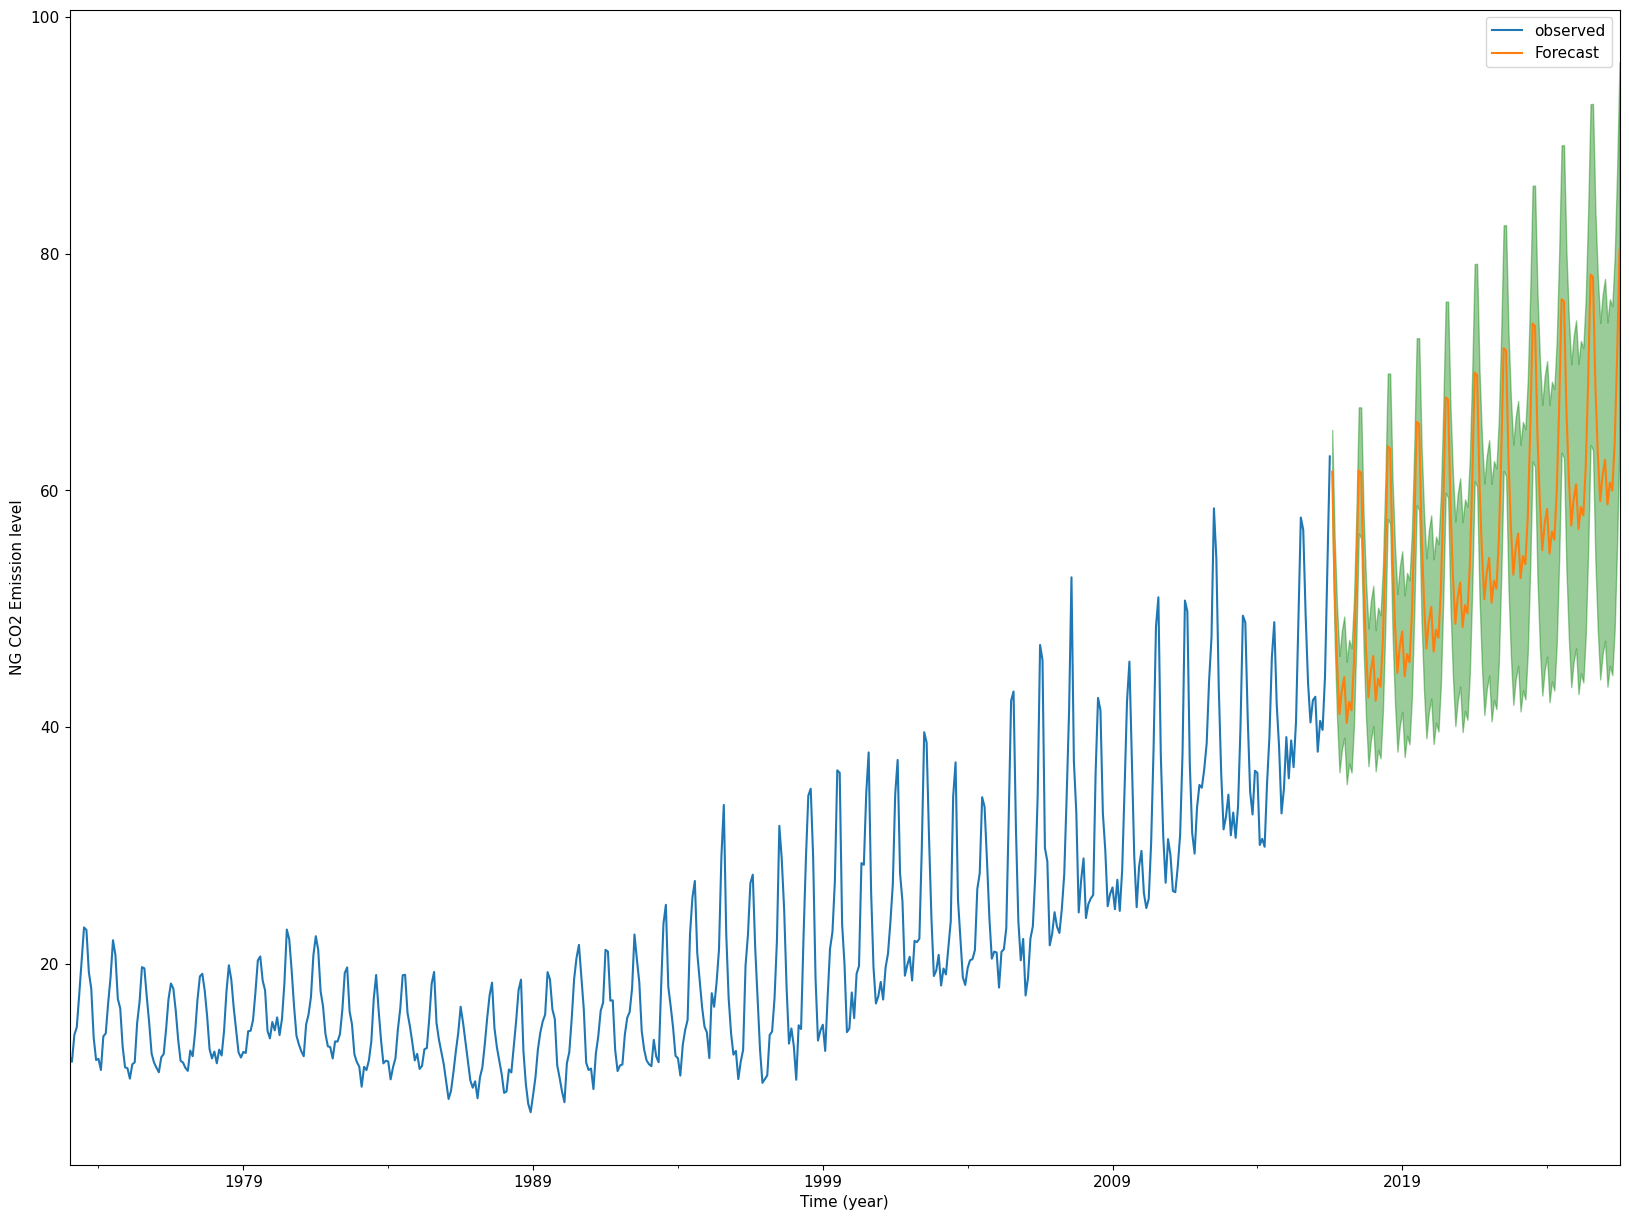

In [332]:
ax = mte.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()

# Conclusion

In this notebook, I have explored how to retrieve CSV dataset, how to transform the dataset into times series, testing if the time series is stationary or not using graphical and Dickey-Fuller test statistic methods, how to transform time series to stationary, how to find optimal parameters to build SARIMA model using grid search method,forecasting 10 year future CO2 emission from power generation using natural gas.